#### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#### Reading the data

In [4]:
app_data = pd.read_csv(r'application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,-2120,nan,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08304,0.26295,0.13938,0.02470,0.03690,0.97220,0.61920,0.01430,0.00000,0.06900,0.08330,0.12500,0.03690,0.02020,0.01900,0.00000,0.00000,0.02520,0.03830,0.97220,0.63410,0.01440,0.00000,0.06900,0.08330,0.12500,0.03770,0.02200,0.01980,0.00000,0.00000,0.02500,0.03690,0.97220,0.62430,0.01440,0.00000,0.06900,0.08330,0.12500,0.03750,0.02050,0.01930,0.00000,0.00000,reg oper account,block of flats,0.01490,"Stone, brick",No,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,nan,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31127,0.62225,nan,0.09590,0.05290,0.98510,0.79600,0.06050,0.08000,0.03450,0.29170,0.33330,0.01300,0.07730,0.05490,0.00390,0.00980,0.09240,0.05380,0.98510,0.80400,0.04970,0.08060,0.03450,0.29170,0.33330,0.01280,0.07900,0.05540,0.00000,0.00000,0.09680,0.05290,0.98510,0.79870,0.06080,0.08000,0.03450,0.29170,0.33330,0.01320,0.07870,0.05580,0.00390,0.01000,reg oper account,block of flats,0.07140,Block,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / 

### Checking the structure of the data

In [5]:
# shape of the data
app_data.shape

(307511, 122)

In [6]:
# columns of the data
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
# info of the data
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# describe of the data
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,104582.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307509.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,134133.00000,306851.00000,246546.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,159080.00000,306490.00000,306490.00000,306490.00000,306490.00000,307510.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,-4986.12033,-2994.20237,12.06109,1.00000,0.81989,0.19937,0.99813,0.28107,0.05672,2.15267,2.05246,2.03152,12.06342,0.01514,0.05077,0.04066,0.07817,0.23045,0.17955,0.50213,0.51439,0.51085,0.11744,0.08844,0.97773,0.75247,0.04462,0.07894,0.14972,0.22628,0.23189,0.06633,0.10077,0.10740,0.00881,0.02836,0.11423,0.08754,0.97707,0.75964,0.04255,0.07449,0.14519,0.22232,0.22806,0.06496,0.10564,0.10598,0.00808,0.02702,0.11785,0.08795,0.97775,0.75575,0.04460,0.07808,0.14921,0.22590,0.23162,0.06717,0.10195,0.10861,0.00865,0.02824,0.10255,1.42225,0.14342,1.40529,0.10005,-962.85879,0.00004,0.71002,0.0

## Checking the percentage of the null values and treating them

In [9]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)

SK_ID_CURR                      0.00000
TARGET                          0.00000
NAME_CONTRACT_TYPE              0.00000
CODE_GENDER                     0.00000
FLAG_OWN_CAR                    0.00000
FLAG_OWN_REALTY                 0.00000
CNT_CHILDREN                    0.00000
AMT_INCOME_TOTAL                0.00000
AMT_CREDIT                      0.00000
AMT_ANNUITY                     0.00000
AMT_GOODS_PRICE                 0.09000
NAME_TYPE_SUITE                 0.42000
NAME_INCOME_TYPE                0.00000
NAME_EDUCATION_TYPE             0.00000
NAME_FAMILY_STATUS              0.00000
NAME_HOUSING_TYPE               0.00000
REGION_POPULATION_RELATIVE      0.00000
DAYS_BIRTH                      0.00000
DAYS_EMPLOYED                   0.00000
DAYS_REGISTRATION               0.00000
DAYS_ID_PUBLISH                 0.00000
OWN_CAR_AGE                    65.99000
FLAG_MOBIL                      0.00000
FLAG_EMP_PHONE                  0.00000
FLAG_WORK_PHONE                 0.00000


### Identifying the columns with more than 50% null percentage values


In [10]:
# preparing the list of all the columns to check the columns with null percentage > 50
columns_list = list(app_data.columns)
null_columns_list = []
for i in columns_list:
    if round(100*(app_data[i].isnull().sum()/len(app_data.index)),2) > 50:
        null_columns_list.append(i)
round(100*(app_data[null_columns_list].isnull().sum()/len(app_data.index)),2 )

OWN_CAR_AGE                65.99000
EXT_SOURCE_1               56.38000
APARTMENTS_AVG             50.75000
BASEMENTAREA_AVG           58.52000
YEARS_BUILD_AVG            66.50000
COMMONAREA_AVG             69.87000
ELEVATORS_AVG              53.30000
ENTRANCES_AVG              50.35000
FLOORSMIN_AVG              67.85000
LANDAREA_AVG               59.38000
LIVINGAPARTMENTS_AVG       68.35000
LIVINGAREA_AVG             50.19000
NONLIVINGAPARTMENTS_AVG    69.43000
NONLIVINGAREA_AVG          55.18000
APARTMENTS_MODE            50.75000
BASEMENTAREA_MODE          58.52000
YEARS_BUILD_MODE           66.50000
COMMONAREA_MODE            69.87000
ELEVATORS_MODE             53.30000
ENTRANCES_MODE             50.35000
FLOORSMIN_MODE             67.85000
LANDAREA_MODE              59.38000
LIVINGAPARTMENTS_MODE      68.35000
LIVINGAREA_MODE            50.19000
NONLIVINGAPARTMENTS_MODE   69.43000
NONLIVINGAREA_MODE         55.18000
APARTMENTS_MEDI            50.75000
BASEMENTAREA_MEDI          5

__INFERENCE ABOUT MISSING VALUES > 50%__: <br>These columns can be removed from the dataset as these have high null percentage, but as of now no need to drop these columns from the dataframe as we will be considering only the segmented dataframe for analysis which doesn't include such columns. Hence it is sufficient to report that the above columns with null percentage > 50% can be removed from the dataframe.

### Identifying the columns with null percentage < 32%

In [11]:
null_columns_list_less = []
for i in columns_list:
    if round(100*(app_data[i].isnull().sum()/len(app_data.index)),2) < 32:
        null_columns_list_less.append(i)
round(100*(app_data[null_columns_list_less].isnull().sum()/len(app_data.index)),2)

SK_ID_CURR                     0.00000
TARGET                         0.00000
NAME_CONTRACT_TYPE             0.00000
CODE_GENDER                    0.00000
FLAG_OWN_CAR                   0.00000
FLAG_OWN_REALTY                0.00000
CNT_CHILDREN                   0.00000
AMT_INCOME_TOTAL               0.00000
AMT_CREDIT                     0.00000
AMT_ANNUITY                    0.00000
AMT_GOODS_PRICE                0.09000
NAME_TYPE_SUITE                0.42000
NAME_INCOME_TYPE               0.00000
NAME_EDUCATION_TYPE            0.00000
NAME_FAMILY_STATUS             0.00000
NAME_HOUSING_TYPE              0.00000
REGION_POPULATION_RELATIVE     0.00000
DAYS_BIRTH                     0.00000
DAYS_EMPLOYED                  0.00000
DAYS_REGISTRATION              0.00000
DAYS_ID_PUBLISH                0.00000
FLAG_MOBIL                     0.00000
FLAG_EMP_PHONE                 0.00000
FLAG_WORK_PHONE                0.00000
FLAG_CONT_MOBILE               0.00000
FLAG_PHONE               

### Treating the missing values columns with null percentage < 32%

##### 1) Treating AMT_GOODS_PRICE column which has null percentage 0.09%

Column description:<br>For consumer loans it is the price of the goods for which the loan is given.

In [12]:
# observing the AMT_GOODS_PRICE columns
app_data['AMT_GOODS_PRICE'].head()

0    351000.00000
1   1129500.00000
2    135000.00000
3    297000.00000
4    513000.00000
Name: AMT_GOODS_PRICE, dtype: float64

In [13]:
# Describe of AMT_GOODS_PRICE columns as it is an numerical attribute
app_data['AMT_GOODS_PRICE'].describe()

count    307233.00000
mean     538396.20743
std      369446.46054
min       40500.00000
25%      238500.00000
50%      450000.00000
75%      679500.00000
max     4050000.00000
Name: AMT_GOODS_PRICE, dtype: float64

In [14]:
# checking for the variation in quartiles
app_data['AMT_GOODS_PRICE'].quantile([0.25,0.50,0.75,0.90,0.95,0.99])

0.25000    238500.00000
0.50000    450000.00000
0.75000    679500.00000
0.90000   1093500.00000
0.95000   1305000.00000
0.99000   1800000.00000
Name: AMT_GOODS_PRICE, dtype: float64

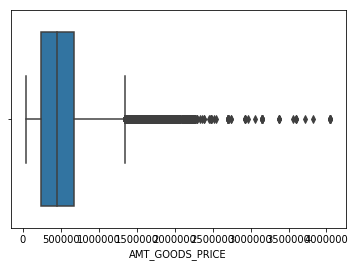

In [15]:
# checking for the outliers in AMT_GOODS_PRICE columns before treating the missing values
# plotting box plot to check for the outliers variation
sns.boxplot(app_data['AMT_GOODS_PRICE'])

In [16]:
# imputing the missing values with MEDIAN value
app_data.loc[app_data['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = app_data['AMT_GOODS_PRICE'].median()

In [17]:
# checking the count of missing values after imputation
app_data['AMT_GOODS_PRICE'].isnull().sum()

0

__Inference from box plot__ <br>
On observing the box plot we can see that majority portion of the plot is occupied between the values of 25th percentile and 75th percentile. Above whiskers there are some series of continous increament values and also values which are very far away from the normal body. Hence due to the presence of outliers it is best to impute with "MEDIAN" value to treat the missing values in AMT_GOODS_PRICE column.

##### 2) Treating the missing values in NAME_TYPE_SUITE  column

Column Description:<br> Who was accompanying client when he was applying for the loan.

In [18]:
# analyzing the NAME_TYPE_SUITE columns
app_data['NAME_TYPE_SUITE'].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [19]:
# since it is an categorical column, checking the value_counts
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [20]:
# Imputing the missing values with Unaccompanied
app_data.loc[app_data['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE'] = 'Unaccompanied'

In [21]:
# checking the null values after imputation
app_data['NAME_TYPE_SUITE'].isnull().sum()

0

From value counts we can observe that "Unaccompanied" is the most frequent occuring value. Hence using this value the missing values can be replaced in NAME_TYPE_SUITE column.

##### 3) Treating OCCUPATION_TYPE column

Column description: <br>What kind of occupation does the client have.

In [22]:
# analyzing OCCUPATION_TYPE column
app_data['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [23]:
# since it is an categorical attribute performing value counts
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
# As per the nature of the columns it is not possible to impute with frequent value.
# Hence all the missing values have been categorized under 'Unknown'
app_data.loc[app_data['OCCUPATION_TYPE'].isnull(),'OCCUPATION_TYPE'] = 'Unknown'

In [25]:
# checnking the missing values count after imputation
app_data['OCCUPATION_TYPE'].isnull().sum()

0

As per the nature of the column it is not an best practise to impute with frequent occuring value as it may cause biased results. Hence in this case it is best to consider them as proper missing values itself and carry out the further analysis.

##### 4) Treating missing values in AMT_REQ_CREDIT_BUREAU_HOUR.

Column description: <br> Number of enquiries to Credit Bureau about the client one hour before application.

In [26]:
# analyzing AMT_REQ_CREDIT_BUREAU_HOUR column which has null percentage = 13.50%
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].head()

0   0.00000
1   0.00000
2   0.00000
3       nan
4   0.00000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [27]:
# Since it represents the number of counts of information asked to credit bureau, it can be treated as categorical ordered attribute
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.00000    264366
1.00000      1560
2.00000        56
3.00000         9
4.00000         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

As per the value counts we can see that asking 0 times one hour before the application has significantly high value. Hence the null values in "AMT_REQ_CREDIT_BUREAU_HOUR" can be replaced with the most repeated value i.e. "264366".

##### 5) Treating  missing values in AMT_REQ_CREDIT_BUREAU_DAY  column

Column description: <br> Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application).

In [28]:
# analyzing AMT_REQ_CREDIT_BUREAU_DAY column
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].head()

0   0.00000
1   0.00000
2   0.00000
3       nan
4   0.00000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [29]:
# Since it represents the count. We can check value counts
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.00000    264503
1.00000      1292
2.00000       106
3.00000        45
4.00000        26
5.00000         9
6.00000         8
9.00000         2
8.00000         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

As per the value counts we can see that asking 0 times one day before the application has significantly high value. Hence the null values in "AMT_REQ_CREDIT_BUREAU_DAY" can be replaced with the most repeated value i.e. "264503".

#####  6) Treating missing values in AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR.
 

Columns description for each of the columns:<br> AMT_REQ_CREDIT_BUREAU_WEEK: Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)<br> AMT_REQ_CREDIT_BUREAU_MON: Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application).<br>AMT_REQ_CREDIT_BUREAU_QRT:Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application).<br>AMT_REQ_CREDIT_BUREAU_YEAR: Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application).

In [30]:
# checking value counts in AMT_REQ_CREDIT_BUREAU_WEEK
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.00000    257456
1.00000      8208
2.00000       199
3.00000        58
4.00000        34
6.00000        20
5.00000        10
8.00000         5
7.00000         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [31]:
# Checking value counts in AMT_REQ_CREDIT_BUREAU_MON
app_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.00000     222233
1.00000      33147
2.00000       5386
3.00000       1991
4.00000       1076
5.00000        602
6.00000        343
7.00000        298
9.00000        206
8.00000        185
10.00000       132
11.00000       119
12.00000        77
13.00000        72
14.00000        40
15.00000        35
16.00000        23
17.00000        14
18.00000         6
19.00000         3
24.00000         1
27.00000         1
22.00000         1
23.00000         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [32]:
# checking value counts in AMT_REQ_CREDIT_BUREAU_QRT
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.00000      215417
1.00000       33862
2.00000       14412
3.00000        1717
4.00000         476
5.00000          64
6.00000          28
7.00000           7
8.00000           7
19.00000          1
261.00000         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [33]:
# checking value counts in AMT_REQ_CREDIT_BUREAU_YEAR
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.00000     71801
1.00000     63405
2.00000     50192
3.00000     33628
4.00000     20714
5.00000     12052
6.00000      6967
7.00000      3869
8.00000      2127
9.00000      1096
11.00000       31
12.00000       30
10.00000       22
13.00000       19
14.00000       10
17.00000        7
15.00000        6
19.00000        4
18.00000        4
16.00000        3
21.00000        1
23.00000        1
25.00000        1
20.00000        1
22.00000        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [34]:
# imputing missing values for the above mentioned columns
req_list = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in req_list:
    app_data.loc[app_data[i].isnull(), i] = 0
for i in req_list:
    print('The null values in {} {}'.format(i, app_data[i].isnull().sum()))

The null values in AMT_REQ_CREDIT_BUREAU_HOUR 0
The null values in AMT_REQ_CREDIT_BUREAU_DAY 0
The null values in AMT_REQ_CREDIT_BUREAU_WEEK 0
The null values in AMT_REQ_CREDIT_BUREAU_MON 0
The null values in AMT_REQ_CREDIT_BUREAU_QRT 0
The null values in AMT_REQ_CREDIT_BUREAU_YEAR 0


Hence based upon the value counts, for all the above mentioned column with null percentage = 13.5% can be replaced with the most frequent value from their respective value counts.

##### 6) Treating missing values in EXT_SOURCE_3 & EXT_SOURCE_2

Column description:<br>Normalized score from external data source.

In [35]:
# analyzing the column EXT_SOURCE_3 
app_data['EXT_SOURCE_3'].head()

0   0.13938
1       nan
2   0.72957
3       nan
4       nan
Name: EXT_SOURCE_3, dtype: float64

In [36]:
# Since it is an numerical attribute, describe can be found
app_data['EXT_SOURCE_3'].describe()

count   246546.00000
mean         0.51085
std          0.19484
min          0.00053
25%          0.37065
50%          0.53528
75%          0.66906
max          0.89601
Name: EXT_SOURCE_3, dtype: float64

In [37]:
# imputing missing values with mean
app_data.loc[app_data['EXT_SOURCE_3'].isnull(),'EXT_SOURCE_3'] = app_data['EXT_SOURCE_3'].mean()

In [38]:
# checking the null values after imputation
app_data['EXT_SOURCE_3'].isnull().sum()

0

In [39]:
# analyzing the column EXT_SOURCE_2
app_data['EXT_SOURCE_2'].head()

0   0.26295
1   0.62225
2   0.55591
3   0.65044
4   0.32274
Name: EXT_SOURCE_2, dtype: float64

In [40]:
# Since it is an numerical attribute checking the describe of the column
app_data['EXT_SOURCE_2'].describe()

count   306851.00000
mean         0.51439
std          0.19106
min          0.00000
25%          0.39246
50%          0.56596
75%          0.66362
max          0.85500
Name: EXT_SOURCE_2, dtype: float64

In [41]:
# imputing missing values with mean
app_data.loc[app_data['EXT_SOURCE_2'].isnull(),'EXT_SOURCE_2'] = app_data['EXT_SOURCE_2'].mean()

In [42]:
# checking null values after imputation
app_data['EXT_SOURCE_2'].isnull().sum()

0

As per the describe in both columns it clearly indicates that there is decent increment between the percentiles. Which is an clear indication that there are no outliers in the column. Hence it is better to impute the missing values with "MEAN" values in both.

##### 7) Treating the missing values in  OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE


Column description:<br> These represent the number of observations made by the client in social circle for the respective fields.

In [43]:
# analyzing OBS_30_CNT_SOCIAL_CIRCLE
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].head()

0   2.00000
1   1.00000
2   0.00000
3   2.00000
4   0.00000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [44]:
# Since it is represents the count, value counts can be calculated
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.00000      163910
1.00000       48783
2.00000       29808
3.00000       20322
4.00000       14143
5.00000        9553
6.00000        6453
7.00000        4390
8.00000        2967
9.00000        2003
10.00000       1376
11.00000        852
12.00000        652
13.00000        411
14.00000        258
15.00000        166
16.00000        133
17.00000         88
18.00000         46
19.00000         44
20.00000         30
21.00000         29
22.00000         22
23.00000         15
24.00000         11
25.00000         11
27.00000          5
26.00000          3
30.00000          2
28.00000          1
348.00000         1
29.00000          1
47.00000          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [45]:
# analyzing the value counts for DEF_30_CNT_SOCIAL_CIRCLE
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.00000     271324
1.00000      28328
2.00000       5323
3.00000       1192
4.00000        253
5.00000         56
6.00000         11
7.00000          1
8.00000          1
34.00000         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [46]:
# analyzing the value counts for OBS_60_CNT_SOCIAL_CIRCLE
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.00000      164666
1.00000       48870
2.00000       29766
3.00000       20215
4.00000       13946
5.00000        9463
6.00000        6349
7.00000        4344
8.00000        2886
9.00000        1959
10.00000       1335
11.00000        837
12.00000        620
13.00000        401
14.00000        238
15.00000        166
16.00000        137
17.00000         73
18.00000         49
19.00000         44
20.00000         30
21.00000         28
22.00000         20
23.00000         13
24.00000         12
25.00000         11
27.00000          5
29.00000          2
28.00000          1
344.00000         1
47.00000          1
26.00000          1
30.00000          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [47]:
# analyzing the value counts for  DEF_60_CNT_SOCIAL_CIRCLE
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.00000     280721
1.00000      21841
2.00000       3170
3.00000        598
4.00000        135
5.00000         20
6.00000          3
24.00000         1
7.00000          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [48]:
req_list = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
for i in req_list:
    app_data.loc[app_data[i].isnull(), i] = 0
for i in req_list:
    print('The null values in {} {}'.format(i, app_data[i].isnull().sum()))

The null values in OBS_30_CNT_SOCIAL_CIRCLE 0
The null values in DEF_30_CNT_SOCIAL_CIRCLE 0
The null values in OBS_60_CNT_SOCIAL_CIRCLE 0
The null values in DEF_60_CNT_SOCIAL_CIRCLE 0


Based on the above value counts it clear indicates that 0 count has significant high number. hence it can be considered to impute the missing values in the above columns.

##### 8) Treating missing values in CNT_FAM_MEMBERS

In [49]:
# analyzing the value counts
app_data['CNT_FAM_MEMBERS'].value_counts()

2.00000     158357
1.00000      67847
3.00000      52601
4.00000      24697
5.00000       3478
6.00000        408
7.00000         81
8.00000         20
9.00000          6
10.00000         3
14.00000         2
16.00000         2
12.00000         2
20.00000         2
11.00000         1
13.00000         1
15.00000         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [50]:
# imputing the missing value with most frequent value
app_data.loc[app_data['CNT_FAM_MEMBERS'].isnull(), 'CNT_FAM_MEMBERS'] = 2.0

In [51]:
# checking the count after imputation
app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [52]:
# checking the null value percentages for the columns < 32%
null_columns_list_32 = []
for i in columns_list:
    if round(100*(app_data[i].isnull().sum()/len(app_data.index)),2) < 32:
        null_columns_list_32.append(i)
round(100*(app_data[null_columns_list_32].isnull().sum()/len(app_data.index)),2)

SK_ID_CURR                    0.00000
TARGET                        0.00000
NAME_CONTRACT_TYPE            0.00000
CODE_GENDER                   0.00000
FLAG_OWN_CAR                  0.00000
FLAG_OWN_REALTY               0.00000
CNT_CHILDREN                  0.00000
AMT_INCOME_TOTAL              0.00000
AMT_CREDIT                    0.00000
AMT_ANNUITY                   0.00000
AMT_GOODS_PRICE               0.00000
NAME_TYPE_SUITE               0.00000
NAME_INCOME_TYPE              0.00000
NAME_EDUCATION_TYPE           0.00000
NAME_FAMILY_STATUS            0.00000
NAME_HOUSING_TYPE             0.00000
REGION_POPULATION_RELATIVE    0.00000
DAYS_BIRTH                    0.00000
DAYS_EMPLOYED                 0.00000
DAYS_REGISTRATION             0.00000
DAYS_ID_PUBLISH               0.00000
FLAG_MOBIL                    0.00000
FLAG_EMP_PHONE                0.00000
FLAG_WORK_PHONE               0.00000
FLAG_CONT_MOBILE              0.00000
FLAG_PHONE                    0.00000
FLAG_EMAIL  

## Checking the data types of the columns

In [53]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


few columns the data types are not proper and needs to be changed to their proper respective data types. The following columns whose data types needs to be changed are: <br> DAYS_REGISTRATION<br>CNT_FAM_MEMBERS<br>OBS_30_CNT_SOCIAL_CIRCLE<br>DEF_30_CNT_SOCIAL_CIRCLE<br>OBS_60_CNT_SOCIAL_CIRCLE<br>DEF_60_CNT_SOCIAL_CIRCLE<br>DAYS_LAST_PHONE_CHANGE<br>AMT_REQ_CREDIT_BUREAU_HOUR<br>AMT_REQ_CREDIT_BUREAU_DAY<br>AMT_REQ_CREDIT_BUREAU_WEEK<br>AMT_REQ_CREDIT_BUREAU_MON<br>AMT_REQ_CREDIT_BUREAU_QRT<br>AMT_REQ_CREDIT_BUREAU_YEAR.<br><br> For the above mentioned columns the data type is in 'float', which needs to be converted into 'int'. But one common feature in dataframe is it's converts most of its numerical data into float inorder to prevent data loss. Other than that there is no musch difference in making conversion into 'int'.

In [54]:
# Changing the data type of DAYS_REGISTRATION column from float to int
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].astype(int)

In [55]:
# Changing the data type of CNT_FAM_MEMBERS column from float to int
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype(int)

In [56]:
# Changing the data type of AMT_REQ_CREDIT_BUREAU_HOUR column from float to int
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int)

## Segmenting the dataframe by considering the neccessary columns only for analysis.

In [57]:
# Listing down the required_columns
required_columns = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
required_columns

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [58]:
# considering only these columns thereby segemnting the datafram
app_data1 = app_data[required_columns]
app_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,2.00000,2.00000,2.00000
1,100003,0,Cash loans,F,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,1.00000,0.00000,1.00000,0.00000
2,100004,0,Revolving loans,M,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,-19046,-225,Laborers,1,2,2,MONDAY,0,0,0,0,0,0,Government,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,-19005,-3039,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,0.00000,2.00000,0.00000
4,100007,0,Cash loans,M,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,-19932,-3038,Core staff,1,2,2,THURSDAY,0,0,0,0,1,1,Religion,0.00000,0.00000,0.00000,0.00000


In [59]:
# analyzing the shape of the segemented dataframe
app_data1.shape

(307511, 33)

In [60]:
# checking the null values percentage in app_data1
round(100*(app_data1.isnull().sum()/len(app_data1.index)),2)

SK_ID_CURR                    0.00000
TARGET                        0.00000
NAME_CONTRACT_TYPE            0.00000
CODE_GENDER                   0.00000
FLAG_OWN_REALTY               0.00000
CNT_CHILDREN                  0.00000
AMT_INCOME_TOTAL              0.00000
AMT_CREDIT                    0.00000
AMT_ANNUITY                   0.00000
AMT_GOODS_PRICE               0.00000
NAME_INCOME_TYPE              0.00000
NAME_EDUCATION_TYPE           0.00000
NAME_FAMILY_STATUS            0.00000
NAME_HOUSING_TYPE             0.00000
REGION_POPULATION_RELATIVE    0.00000
DAYS_BIRTH                    0.00000
DAYS_EMPLOYED                 0.00000
OCCUPATION_TYPE               0.00000
CNT_FAM_MEMBERS               0.00000
REGION_RATING_CLIENT          0.00000
REGION_RATING_CLIENT_W_CITY   0.00000
WEEKDAY_APPR_PROCESS_START    0.00000
REG_REGION_NOT_LIVE_REGION    0.00000
REG_REGION_NOT_WORK_REGION    0.00000
LIVE_REGION_NOT_WORK_REGION   0.00000
REG_CITY_NOT_LIVE_CITY        0.00000
REG_CITY_NOT

## Handling the outliers

In [61]:
# identifying the numerical variables from app_data1
app_data1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                  int32
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY   

##### 1) analyzing for the outliers in AMT_INCOME_TOTAL

In [62]:
app_data1['AMT_INCOME_TOTAL'].describe()

count      307511.00000
mean       168797.91930
std        237123.14628
min         25650.00000
25%        112500.00000
50%        147150.00000
75%        202500.00000
max     117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

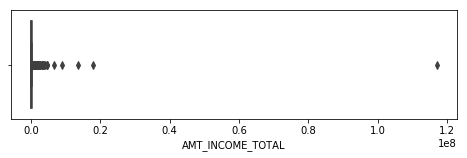

In [63]:
# plotting box plot to visual presence of outliers or not
plt.figure(figsize= (8,2))
sns.boxplot(app_data1['AMT_INCOME_TOTAL'])

From the above box plot we can see that the complete main body i.e. the portion where major part of the data lies within a small range. Also we can see that above the whisker line there are series of continous increasing values. These are not the values which are completely away from the main body, these are just high values. It is a natural trend of income that some might have high income. Let's further examine more using quantiles.

In [64]:
app_data1['AMT_INCOME_TOTAL'].quantile([0.25,0.50,0.75,0.90,0.95,0.99,1])

0.25000      112500.00000
0.50000      147150.00000
0.75000      202500.00000
0.90000      270000.00000
0.95000      337500.00000
0.99000      472500.00000
1.00000   117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

By analyzing the quantiles we can see that the values are continously increasing upto 99th percentile and above that there is an huge increase of value between 99th percentile and the max value. So let further more exmaine the values above 472500 before taking some informed decision.

In [65]:
app_data1[app_data1['AMT_INCOME_TOTAL']>472500].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000,3014.00000
mean,278051.38653,0.05375,0.50265,755320.02522,1120845.74453,51183.06868,1040177.62624,0.03268,-15728.23324,20474.35899,2.26974,1.65893,1.63271,0.04512,0.15063,0.12873,0.07100,0.19144,0.15992,0.97346,0.08494,0.96251,0.05674
std,102640.83379,0.22556,0.78980,2186735.40073,591936.76114,28742.97209,560812.30450,0.02301,3503.82254,89217.54630,0.96154,0.62298,0.60871,0.20761,0.35775,0.33496,0.25687,0.39350,0.36659,1.97141,0.34386,1.95797,0.27101
min,100059.00000,0.00000,0.00000,475047.00000,45000.00000,5598.00000,45000.00000,0.00128,-25117.00000,-15043.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,190164.25000,0.00000,0.00000,540000.00000,675000.00000,33910.87500,675000.00000,0.01166,-18324.75000,-3365.50000,2.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,276974.00000,0.00000,0.00000,630000.00000,1024740.00000,45954.00000,900000.00000,0.02866,-15479.50000,-1781.50000,2.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,368538.25000,0.00000,1.00000,678937.50000,1354500.00000,62352.00000,1350000.00000,0.04622,-12995.50000,-789.00000,3.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
max,456236.00000,1.00000,5.00000,117000000.00000,4050000.00000,258025.50000,4050000.00000,0.07251,-7793.00000,365243.00000,7.00000,3.00000,3.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,20.00000,4.00000,20.00000,4.00000


In [66]:
# analyzing using IQR method
q1 = app_data1['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = app_data1['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = q3 - q1
upper_value  = q3 + 1.5*IQR
lower_value = q1 - 1.5*IQR
app_data1[(app_data1['AMT_INCOME_TOTAL']> upper_value)|(app_data1['AMT_INCOME_TOTAL'] < lower_value)].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000,14035.00000
mean,278022.09939,0.05814,0.47795,472707.80849,1002074.67029,44962.61104,920881.30656,0.03003,-15767.09989,26213.50688,2.24681,1.73267,1.69704,0.04182,0.14022,0.11664,0.07759,0.21418,0.17471,1.11578,0.10025,1.10289,0.06662
std,102949.54334,0.23402,0.75943,1024481.77169,536631.66409,22417.03199,505218.04183,0.02185,3607.79684,98845.50260,0.93035,0.61829,0.60009,0.20019,0.34723,0.32100,0.26754,0.41027,0.37973,2.06608,0.37141,2.04947,0.29493
min,100010.00000,0.00000,0.00000,337545.00000,45000.00000,3523.50000,45000.00000,0.00053,-25229.00000,-16365.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189469.50000,0.00000,0.00000,360000.00000,592560.00000,30838.50000,499500.00000,0.01056,-18481.50000,-3335.50000,2.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,277411.00000,0.00000,0.00000,405000.00000,900000.00000,42142.50000,900000.00000,0.02516,-15521.00000,-1753.00000,2.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,368321.00000,0.00000,1.00000,450000.00000,1306008.00000,54846.00000,1174500.00000,0.04622,-12951.50000,-729.50000,3.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
max,456240.00000,1.00000,5.00000,117000000.00000,4050000.00000,258025.50000,4050000.00000,0.07251,-7761.00000,365243.00000,7.00000,3.00000,3.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,27.00000,5.00000,27.00000,5.00000


In [67]:
# analyzing the count of outliers obtained through IQR method within AMT_INCOME_TOTAL column
len(app_data1.loc[(app_data1['AMT_INCOME_TOTAL']> upper_value)|(app_data1['AMT_INCOME_TOTAL'] < lower_value),'AMT_INCOME_TOTAL'])

14035

__Conclusion__: From the describe we can see that income total, credit, annuity and goods price are considerably high. So caping the outliers to the closed percentile value will create loss of value. Dropping them is not an option as these correspond to the higher segment of income, credit and annuity. Naturally these fall under the category of higher section of credit amounts. Hence it can be decided to do analysis taking into consideriation of presence of high values and consider quantiles,medians. Through IQR method we get to know that there are many high values within this column. Hence dropping their respective rows will make the complete analysis biased. Also capping them to the closest percentile is not an correct option. Hence it is better to consider their quantile values during analysis of the variable or binning can be done.

##### 2) analyzing the outliers in AMT_CREDIT

In [68]:
app_data1['AMT_CREDIT'].head()

0    406597.50000
1   1293502.50000
2    135000.00000
3    312682.50000
4    513000.00000
Name: AMT_CREDIT, dtype: float64

In [69]:
# describing the AMT_CREDIT columns
app_data1['AMT_CREDIT'].describe()

count    307511.00000
mean     599025.99971
std      402490.77700
min       45000.00000
25%      270000.00000
50%      513531.00000
75%      808650.00000
max     4050000.00000
Name: AMT_CREDIT, dtype: float64

From the describe of the column we can see that there is no much difference between mean and median. Also there is an continous increase in range of percentiles. The difference between max value and 75th percentile is considerablr high. Let's examine more using box plot and by quantiles to know exactly the variation in the values as they can be increasing in an natural order.

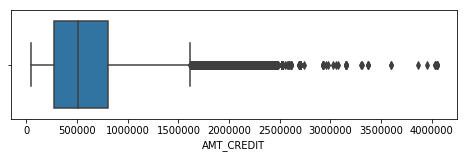

In [70]:
# analyzing using box plot
plt.figure(figsize = (8,2))
sns.boxplot(app_data1['AMT_CREDIT'])

From the above box plot we can observe that main body of the box plot is confined between the quantiles and also just above the whiskers the values still increasing in an continous order not like completely ditached from the main body and high. These are just high values as per natural credit terms. Let's examine more using quantiles

In [71]:
# analyzing using quantiles
app_data1['AMT_CREDIT'].quantile([0.25,0.5,0.75,0.90,0.95,0.99])

0.25000    270000.00000
0.50000    513531.00000
0.75000    808650.00000
0.90000   1133748.00000
0.95000   1350000.00000
0.99000   1854000.00000
Name: AMT_CREDIT, dtype: float64

In [72]:
# analyzing the describe of the dataframe above 99th percentile value of AMT_CREDIT column
app_data1[app_data1['AMT_CREDIT']> 1854000].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000,3075.00000
mean,279581.18569,0.04033,0.41398,337156.23900,2141240.23317,67916.11463,1959634.42683,0.02857,-16387.27967,41365.57789,2.25561,1.76846,1.73236,0.03447,0.11610,0.09236,0.06179,0.18374,0.14634,1.27610,0.10081,1.25821,0.06341
std,102955.77943,0.19675,0.71874,211848.70165,259432.90255,22596.49410,279311.62855,0.02102,3802.54850,119644.48036,0.84311,0.61724,0.59894,0.18247,0.32039,0.28958,0.24081,0.38733,0.35351,2.18624,0.36016,2.16323,0.27628
min,100219.00000,0.00000,0.00000,25650.00000,1854504.00000,42025.50000,1548000.00000,0.00128,-25229.00000,-15516.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,191962.00000,0.00000,0.00000,225000.00000,1971072.00000,55507.50000,1800000.00000,0.01015,-19606.00000,-3422.00000,2.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,277571.00000,0.00000,0.00000,292500.00000,2022565.50000,63351.00000,1800000.00000,0.02280,-16246.00000,-1672.00000,2.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,371242.00000,0.00000,1.00000,387000.00000,2250000.00000,70787.25000,2250000.00000,0.03579,-13396.00000,-499.00000,3.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,2.00000,0.00000
max,456155.00000,1.00000,4.00000,4500000.00000,4050000.00000,258025.50000,4050000.00000,0.07251,-7729.00000,365243.00000,6.00000,3.00000,3.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,23.00000,5.00000,23.00000,4.00000


In [73]:
# analyzing using IQR method
IQR = app_data1['AMT_CREDIT'].quantile(0.75) - app_data1['AMT_CREDIT'].quantile(0.25)
q1 = app_data1['AMT_CREDIT'].quantile(0.25)
q3 = app_data1['AMT_CREDIT'].quantile(0.75)
upper_value = q3 + 1.5*IQR
lower_value = q1 - 1.5*IQR
outlier_values = app_data1.loc[(app_data1['AMT_CREDIT']> upper_value)| (app_data1['AMT_CREDIT'] < lower_value),'AMT_CREDIT']
outlier_values.head()

60    1663987.50000
135   1755000.00000
189   2250000.00000
235   1710000.00000
314   1800000.00000
Name: AMT_CREDIT, dtype: float64

In [74]:
# analyzing the count of outliers in AMT_CREDIT column
len(outlier_values)

6562

__Conclusion__: From the above describe information and IQR information we can see that there are many such high values present in the column. But at the same time considering the nature of the column it is neccessary to have these values. Dropping such values will cause errors in analysis and also capping them will create value loss. Hence it is better to either bin the values OR consider quantiles, medians during analysis of this variable.

###### binning of AMT_CREDIT column

Taking into consideration of describe and quantile values the column values can be binned accordingly.

In [75]:
app_data1['credit_group'] = pd.cut(app_data1['AMT_CREDIT'], [0,100000,500000,1000000,1500000,2000000,999999999], labels = ['<1L','1L-5L','5L-10L','10L-15L','15L-20L','20L+'])
app_data1['credit_group'].head()

0      1L-5L
1    10L-15L
2      1L-5L
3      1L-5L
4     5L-10L
Name: credit_group, dtype: category
Categories (6, object): [<1L < 1L-5L < 5L-10L < 10L-15L < 15L-20L < 20L+]

In [76]:
# analyzing the value counts of credit_group
app_data1['credit_group'].value_counts()

1L-5L      143329
5L-10L     108193
10L-15L     39229
15L-20L      8727
<1L          6004
20L+         2029
Name: credit_group, dtype: int64

#####  3) analyzing the outliers in AMT_ANNUITY

In [77]:
# analyzing the column
app_data1['AMT_ANNUITY'].head()

0   24700.50000
1   35698.50000
2    6750.00000
3   29686.50000
4   21865.50000
Name: AMT_ANNUITY, dtype: float64

In [78]:
# analyzing the describe of the column
app_data1['AMT_ANNUITY'].describe()

count   307499.00000
mean     27108.57391
std      14493.73732
min       1615.50000
25%      16524.00000
50%      24903.00000
75%      34596.00000
max     258025.50000
Name: AMT_ANNUITY, dtype: float64

From the above we can see that mean and median are very close to each other and also the variation between the percentiles is in continous order. Let's further examine using box plot and quantiles to decide on the presence of outliers and their treatment.

In [79]:
# analyzing using quantiles
app_data1['AMT_ANNUITY'].quantile([0.25,0.50,0.75,0.90,0.95,0.99])

0.25000   16524.00000
0.50000   24903.00000
0.75000   34596.00000
0.90000   45954.00000
0.95000   53325.00000
0.99000   70006.50000
Name: AMT_ANNUITY, dtype: float64

From the above quantile information we can see that upto 99th percentile the values have an uniform increament in their values. Between max and 99th percentile is huge differnece. Let's further examine using box plot to get to know whether from 99th percentile is their any sudden jump in values or normal continous increament.

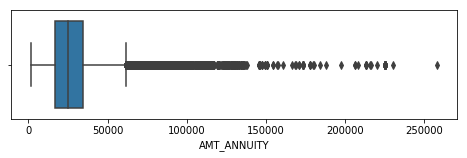

In [80]:
# analyzing the outliers using box plot
plt.figure(figsize = (8,2))
sns.boxplot(app_data1['AMT_ANNUITY'])

From the above box plot again the same thing we can seen that the values above the whisker line are increasing in an continous order rather than sudden hike and then increasing. Hence these can be considered as high values. Sp when needed to consider even high values also in such binning can be done rather than dropping or caping the values.

##### 4) analyzing the outliers in days birth

In [81]:
# analyzing the column
app_data1['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [82]:
# converting the days into years
import math
app_data1['DAYS_BIRTH'] = app_data1['DAYS_BIRTH'].apply(lambda x : math.floor(x*(-1)/365))

In [83]:
# analysing the column after conversion
app_data1['DAYS_BIRTH'].head()

0    25
1    45
2    52
3    52
4    54
Name: DAYS_BIRTH, dtype: int64

In [84]:
# describe of the column
app_data1['DAYS_BIRTH'].describe()

count   307511.00000
mean        43.43597
std         11.95459
min         20.00000
25%         34.00000
50%         43.00000
75%         53.00000
max         69.00000
Name: DAYS_BIRTH, dtype: float64

From the above describe we can clearly observe that mean and median are veru much close to each other and also the variation in the quantiles are continously increasing. The difference between max and 75th percentile is also no much difference. These inferences drive towards to the assumption of no outliers in the data but lets examine further using box plot.

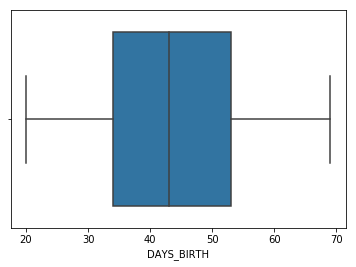

In [85]:
# analyzing the DAYS_BIRTH using box plot
sns.boxplot(app_data1['DAYS_BIRTH'])

__Conclusion__: From the above plot we can clearly conclude that there are outliers present. The complete main body of the data is uniformly distributed between the quantiles. Hence on analysis of DAYS_BIRTH we can conclude that there are no outliers in DAYS_BIRTH.

##### 5) analyzing the outliers in DAYS_EMPLOYED

In [86]:
# analyzing the column
app_data1['DAYS_EMPLOYED'].head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

The days employed are mentioned in days. It is better to convert them into years and rounding off to closed 1 decimal point.

In [87]:
app_data1['DAYS_EMPLOYED'] = app_data1['DAYS_EMPLOYED'].apply(lambda x: round(x*(-1)/365,1))

In [88]:
# analyzing the column after conversion
app_data1['DAYS_EMPLOYED'].head()

0   1.70000
1   3.30000
2   0.60000
3   8.30000
4   8.30000
Name: DAYS_EMPLOYED, dtype: float64

In [89]:
# describe of the column
app_data1['DAYS_EMPLOYED'].describe()

count   307511.00000
mean      -174.84196
std        387.07003
min      -1000.70000
25%          0.80000
50%          3.30000
75%          7.60000
max         49.10000
Name: DAYS_EMPLOYED, dtype: float64

From the above describe we can see that still there are some negative existing after conversion as well. These indicate that there might be chance of presence of outliers which are abnormally low values after conversion. Let's examine further using box plot

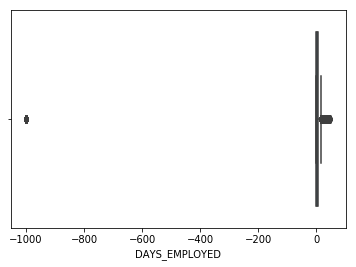

In [90]:
# analyzing the outliers using box plot
sns.boxplot(app_data1['DAYS_EMPLOYED'])

From the above plot we can clearly see that there is no one value which is completely far away from the main body. It is an clear indication of outlier. Due to presence of outlier the main body of the plot is compressed across small range. So lets treat this one outlier using outlier handling methods.

In [91]:
# identification of the outlier
outlier_value = app_data1['DAYS_EMPLOYED'].min()
outlier_value

-1000.7

In [92]:
# lets examint in the column to see how many are there
app_data1.loc[app_data1['DAYS_EMPLOYED'] == outlier_value, 'DAYS_EMPLOYED'].head()

8    -1000.70000
11   -1000.70000
23   -1000.70000
38   -1000.70000
43   -1000.70000
Name: DAYS_EMPLOYED, dtype: float64

In [93]:
# checking the count of outliers in column
len(app_data1.loc[app_data1['DAYS_EMPLOYED'] == outlier_value, 'DAYS_EMPLOYED'])

55374

From the count we see that there are many such values in the column so capping or dropping them will create error in analysis. Hence such values can be treated as missing values.

In [94]:
# Treating outlier values as missing values
app_data1.loc[app_data1['DAYS_EMPLOYED'] == outlier_value, 'DAYS_EMPLOYED'] = np.NaN

In [95]:
# checking the count of missing values after treating outliers as missing values
app_data1['DAYS_EMPLOYED'].isnull().sum()

55374

The count turns out to be same. Hence it indicates that all the outliers have been replaced with missing values.

In [96]:
# descrie of the column
app_data1['DAYS_EMPLOYED'].describe()

count   252137.00000
mean         6.53190
std          6.40657
min          0.00000
25%          2.10000
50%          4.50000
75%          8.70000
max         49.10000
Name: DAYS_EMPLOYED, dtype: float64

from the describe we can see that mean and median values are close enough. Also the variation between the quantiles are continous uniform. Although the difference between the max value and 75th percentile is little high but cannot be considered as outlier as there might be person with more experience. Let's further examine using quantiles and box plot to decide about those values.

In [97]:
# analyzing using quantiles
app_data1['DAYS_EMPLOYED'].quantile([0.25,0.50,0.75,0.9,0.95,0.99])

0.25000    2.10000
0.50000    4.50000
0.75000    8.70000
0.90000   14.60000
0.95000   20.00000
0.99000   31.10000
Name: DAYS_EMPLOYED, dtype: float64

From the quantiles information we can see that upto 95th percentile the values are unifromly increasing with small raise in values. From 95th to 99th percentile there is little comparable raise in value when compared to raise in other quantiles. But lets further examine using box plot to check whether these values have been emerged out as an sudden raise in values or is there is an continuity in increment in values.

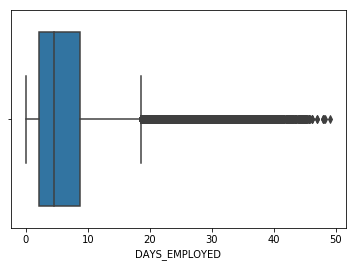

In [98]:
# Now analyzing the column using box plot
sns.boxplot(app_data1['DAYS_EMPLOYED'])

__Conclusion__: From the above plot we can see that above the whisker line there exists some values but these are continous increasing values which are not ditached from the main body of the plot. Hence such values cannot be considered as outliers, those can be said to be just normal high values as it is natural to have people with huge experience as well.

##### 6) analyzing outliers in CNT_FAM_MEMBERS

In [99]:
# analyzing the value counts of CNT_FAM_MEMBERS
app_data1['CNT_FAM_MEMBERS'].value_counts()

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
16         2
12         2
14         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

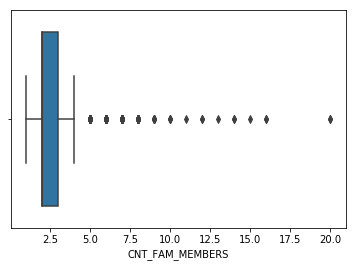

In [100]:
# analyzing using box plot
sns.boxplot(app_data1['CNT_FAM_MEMBERS'])

__Conclusion__: From the above box plot we can see that main body of the data is present between 2-3. There are some high values above the whisker line but as per the nature of the column it is natural to have bug families so these can be just considered as high values. Also binning can be done into categories rather than dropping or capping the values or treating them as missing values.

## Binning of continous variables

#####  1) Binning of DAYS_BIRTH column

In [101]:
# analyzing DAYS_BIRTH column
app_data1['DAYS_BIRTH'].head()

0    25
1    45
2    52
3    52
4    54
Name: DAYS_BIRTH, dtype: int64

In [102]:
# describe of the DAYS_BIRTH column
app_data1['DAYS_BIRTH'].describe()

count   307511.00000
mean        43.43597
std         11.95459
min         20.00000
25%         34.00000
50%         43.00000
75%         53.00000
max         69.00000
Name: DAYS_BIRTH, dtype: float64

In [103]:
# binning of DAYS_BIRTH column
app_data1['age_group'] = pd.cut(app_data1['DAYS_BIRTH'],[20,30,40,50,60,555],labels= ['20-30', '30-40', '40-50', '50-60', '60+'])

In [104]:
# analyzing the column
app_data1['age_group'].head()

0    20-30
1    40-50
2    50-60
3    50-60
4    50-60
Name: age_group, dtype: category
Categories (5, object): [20-30 < 30-40 < 40-50 < 50-60 < 60+]

In [105]:
# analyzing the value counts
app_data1['age_group'].value_counts()

30-40    83117
40-50    74401
50-60    67819
20-30    52805
60+      29368
Name: age_group, dtype: int64

#####  2) binning DAYS_EMPLOYED column

In [106]:
# analyzing DAYS_EMPLOYED column
app_data1['DAYS_EMPLOYED'].head()

0   1.70000
1   3.30000
2   0.60000
3   8.30000
4   8.30000
Name: DAYS_EMPLOYED, dtype: float64

In [107]:
# analyzing the describe of the column
app_data1['DAYS_EMPLOYED'].describe()

count   252137.00000
mean         6.53190
std          6.40657
min          0.00000
25%          2.10000
50%          4.50000
75%          8.70000
max         49.10000
Name: DAYS_EMPLOYED, dtype: float64

In [108]:
# binning DAYS_EMPLOYED
app_data1['experience_group'] = pd.cut(app_data1['DAYS_EMPLOYED'], [0,5,10,15,20,25,555], labels=['0-5','5-10','10-15','15-20','20-25','25+'])

In [109]:
# analyzing experience group column
app_data1['experience_group'].head()

0     0-5
1     0-5
2     0-5
3    5-10
4    5-10
Name: experience_group, dtype: category
Categories (6, object): [0-5 < 5-10 < 10-15 < 15-20 < 20-25 < 25+]

In [110]:
# analyzing value counts
app_data1['experience_group'].value_counts()

0-5      137204
5-10      64326
10-15     27323
15-20     10779
25+        6270
20-25      6178
Name: experience_group, dtype: int64

#####  3) binning  AMT_INCOME_TOTAL column

In [111]:
# analyzing AMT_INCOME_TOTAL column
app_data1['AMT_INCOME_TOTAL'].head()

0   202500.00000
1   270000.00000
2    67500.00000
3   135000.00000
4   121500.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [112]:
# analyzing the describe of AMT_INCOME_TOTAL
app_data1['AMT_INCOME_TOTAL'].describe()

count      307511.00000
mean       168797.91930
std        237123.14628
min         25650.00000
25%        112500.00000
50%        147150.00000
75%        202500.00000
max     117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [113]:
# analyzing AMT_INCOME_TOTAL using quantiles for better grouping
app_data1['AMT_INCOME_TOTAL'].quantile([0.10,0.15,0.20,0.25,0.50,0.75,0.90,0.95,0.99])

0.10000    81000.00000
0.15000    90000.00000
0.20000    99000.00000
0.25000   112500.00000
0.50000   147150.00000
0.75000   202500.00000
0.90000   270000.00000
0.95000   337500.00000
0.99000   472500.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [114]:
# binning of AMT_INCOME_TOTAL
app_data1['income_group']  = pd.cut(app_data1['AMT_INCOME_TOTAL'], [0,300000,600000,900000,1200000,1500000,9999999999], labels= ['<3L','3-6L','6-9L','9-12L','12-15L','15+'])

In [115]:
# analyzing income_group
app_data1['income_group'].head()

0    <3L
1    <3L
2    <3L
3    <3L
4    <3L
Name: income_group, dtype: category
Categories (6, object): [<3L < 3-6L < 6-9L < 9-12L < 12-15L < 15+]

In [116]:
# analyzing the value counts
app_data1['income_group'].value_counts()

<3L       284772
3-6L       21132
6-9L        1329
9-12L        120
15+           84
12-15L        74
Name: income_group, dtype: int64

## Analysis

##### Checking the data imbalance percentage

##### finding the imbalance percentage based on the TARGET column

Column description:<br>Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases).

In [117]:
# analyzing the TARGET column
app_data1['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [118]:
# checking value counts in TARGET
100*(app_data1['TARGET'].value_counts(normalize =  True))

0   91.92712
1    8.07288
Name: TARGET, dtype: float64

From the above normalized value count percentages we can see that about 92% of the people belongs to all other cases and only 8% of the people face some payment difficulties.

## Dividing the data into two sets

Dividing the data into two sets namely T1 and T0 based on the TARGET column. All the rows belonging to 0 value in TARGET column will be placed in T0 dataframe and similarly all the rows belonging to 1 value in TARGET column will be placed into T1 dataframe.

In [119]:
# analyzing the dataframe
app_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,credit_group,age_group,experience_group,income_group
0,100002,1,Cash loans,M,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,25,1.70000,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,2.00000,2.00000,2.00000,1L-5L,20-30,0-5,<3L
1,100003,0,Cash loans,F,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,State servant,Higher education,Married,House / apartment,0.00354,45,3.30000,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,1.00000,0.00000,1.00000,0.00000,10L-15L,40-50,0-5,<3L
2,100004,0,Revolving loans,M,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,52,0.60000,Laborers,1,2,2,MONDAY,0,0,0,0,0,0,Government,0.00000,0.00000,0.00000,0.00000,1L-5L,50-60,0-5,<3L
3,100006,0,Cash loans,F,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,52,8.30000,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,0.00000,2.00000,0.00000,1L-5L,50-60,5-10,<3L
4,100007,0,Cash loans,M,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,54,8.30000,Core staff,1,2,2,THURSDAY,0,0,0,0,1,1,Religion,0.00000,0.00000,0.00000,0.00000,5L-10L,50-60,5-10,<3L


In [120]:
# creating and analyzing T0 dataframe
T0 = app_data1[app_data1['TARGET'] == 0]
T0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,credit_group,age_group,experience_group,income_group
1,100003,0,Cash loans,F,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,State servant,Higher education,Married,House / apartment,0.00354,45,3.30000,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,1.00000,0.00000,1.00000,0.00000,10L-15L,40-50,0-5,<3L
2,100004,0,Revolving loans,M,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,52,0.60000,Laborers,1,2,2,MONDAY,0,0,0,0,0,0,Government,0.00000,0.00000,0.00000,0.00000,1L-5L,50-60,0-5,<3L
3,100006,0,Cash loans,F,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,52,8.30000,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,0.00000,2.00000,0.00000,1L-5L,50-60,5-10,<3L
4,100007,0,Cash loans,M,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,54,8.30000,Core staff,1,2,2,THURSDAY,0,0,0,0,1,1,Religion,0.00000,0.00000,0.00000,0.00000,5L-10L,50-60,5-10,<3L
5,100008,0,Cash loans,M,Y,0,99000.00000,490495.50000,27517.50000,454500.00000,State servant,Secondary / secondary special,Married,House / apartment,0.03579,46,4.40000,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Other,0.00000,0.00000,0.00000,0.00000,1L-5L,40-50,0-5,<3L


In [121]:
# analyzing the shape of T0 dataframe
T0.shape

(282686, 37)

In [122]:
# creating and analyzing T1 dataframe
T1 = app_data1[app_data1['TARGET'] == 1]
T1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,credit_group,age_group,experience_group,income_group
0,100002,1,Cash loans,M,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,25,1.70000,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,2.00000,2.00000,2.00000,1L-5L,20-30,0-5,<3L
26,100031,1,Cash loans,F,Y,0,112500.00000,979992.00000,27076.50000,702000.00000,Working,Secondary / secondary special,Widow,House / apartment,0.01803,51,7.20000,Cooking staff,1,3,2,MONDAY,0,0,0,0,0,0,Business Entity Type 3,10.00000,1.00000,10.00000,0.00000,5L-10L,50-60,5-10,<3L
40,100047,1,Cash loans,M,Y,0,202500.00000,1193580.00000,35028.00000,855000.00000,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02516,47,3.50000,Laborers,2,2,2,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,0.00000,0.00000,0.00000,0.00000,10L-15L,40-50,0-5,<3L
42,100049,1,Cash loans,F,N,0,135000.00000,288873.00000,16258.50000,238500.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00730,36,9.90000,Sales staff,2,3,3,THURSDAY,0,0,0,0,0,0,Self-employed,1.00000,0.00000,1.00000,0.00000,1L-5L,30-40,5-10,<3L
81,100096,1,Cash loans,F,Y,0,81000.00000,252000.00000,14593.50000,252000.00000,Pensioner,Secondary / secondary special,Married,House / apartment,0.02866,67,nan,Unknown,2,2,2,THURSDAY,0,0,0,0,0,0,XNA,1.00000,1.00000,1.00000,1.00000,1L-5L,60+,NaN,<3L


In [123]:
# analyzing the shape of T1 dataframe
T1.shape

(24825, 37)

## Univariate analysis of categorical columns

In [124]:
# analyzing T0 dataframe
T0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,credit_group,age_group,experience_group,income_group
1,100003,0,Cash loans,F,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,State servant,Higher education,Married,House / apartment,0.00354,45,3.30000,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,1.00000,0.00000,1.00000,0.00000,10L-15L,40-50,0-5,<3L
2,100004,0,Revolving loans,M,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,52,0.60000,Laborers,1,2,2,MONDAY,0,0,0,0,0,0,Government,0.00000,0.00000,0.00000,0.00000,1L-5L,50-60,0-5,<3L
3,100006,0,Cash loans,F,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,52,8.30000,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,0.00000,2.00000,0.00000,1L-5L,50-60,5-10,<3L
4,100007,0,Cash loans,M,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,54,8.30000,Core staff,1,2,2,THURSDAY,0,0,0,0,1,1,Religion,0.00000,0.00000,0.00000,0.00000,5L-10L,50-60,5-10,<3L
5,100008,0,Cash loans,M,Y,0,99000.00000,490495.50000,27517.50000,454500.00000,State servant,Secondary / secondary special,Married,House / apartment,0.03579,46,4.40000,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Other,0.00000,0.00000,0.00000,0.00000,1L-5L,40-50,0-5,<3L


In [125]:
# analyzing T1 dataframe
T1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,credit_group,age_group,experience_group,income_group
0,100002,1,Cash loans,M,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,25,1.70000,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,2.00000,2.00000,2.00000,1L-5L,20-30,0-5,<3L
26,100031,1,Cash loans,F,Y,0,112500.00000,979992.00000,27076.50000,702000.00000,Working,Secondary / secondary special,Widow,House / apartment,0.01803,51,7.20000,Cooking staff,1,3,2,MONDAY,0,0,0,0,0,0,Business Entity Type 3,10.00000,1.00000,10.00000,0.00000,5L-10L,50-60,5-10,<3L
40,100047,1,Cash loans,M,Y,0,202500.00000,1193580.00000,35028.00000,855000.00000,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02516,47,3.50000,Laborers,2,2,2,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,0.00000,0.00000,0.00000,0.00000,10L-15L,40-50,0-5,<3L
42,100049,1,Cash loans,F,N,0,135000.00000,288873.00000,16258.50000,238500.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00730,36,9.90000,Sales staff,2,3,3,THURSDAY,0,0,0,0,0,0,Self-employed,1.00000,0.00000,1.00000,0.00000,1L-5L,30-40,5-10,<3L
81,100096,1,Cash loans,F,Y,0,81000.00000,252000.00000,14593.50000,252000.00000,Pensioner,Secondary / secondary special,Married,House / apartment,0.02866,67,nan,Unknown,2,2,2,THURSDAY,0,0,0,0,0,0,XNA,1.00000,1.00000,1.00000,1.00000,1L-5L,60+,NaN,<3L


##### 1) univariate analysis of NAME_CONTRACT_TYPE column in both T1 and T0

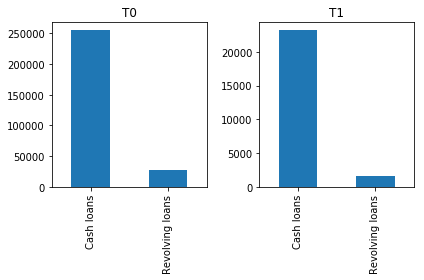

In [126]:
plt.subplot(1,2,1)
T0['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()

From the above univariate analysis on NAME_CONTRACT_TYPE, we can observe that in both the cases clients applied for cash loans rather than revolving loans.

######  2) univariate analysis on CODE_GENDER

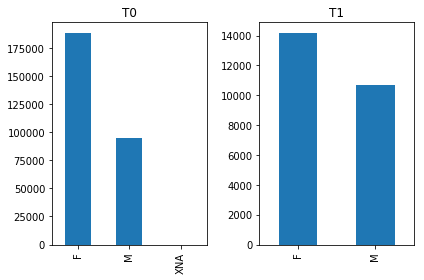

In [127]:
plt.subplot(1,2,1)
T0['CODE_GENDER'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['CODE_GENDER'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()
plt.show()

We can see that there are some values called XNA in T0 dataframe. which can be considered to be as missing values. Hence treat them as missing values.

In [128]:
# treating them as missing values.
T0.loc[T0['CODE_GENDER'] == 'XNA','CODE_GENDER'] = np.NaN

In [129]:
# checking for the missing values in T0 dataframe
T0['CODE_GENDER'].isnull().sum()

4

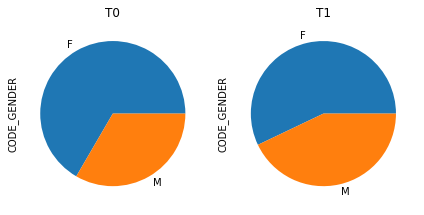

In [130]:
# analyzing them again
plt.subplot(1,2,1)
T0['CODE_GENDER'].value_counts().plot.pie()
plt.title('T0')
plt.subplot(1,2,2)
T1['CODE_GENDER'].value_counts().plot.pie()
plt.title('T1')
plt.tight_layout()
plt.show()

From the above plot we can see that Females are the more applicants who have applied for the loan. At the same time these Females clients are the one who tend be more defaulters when compared to males in T0 plot and again Females are the one tend be more in T1 plot as well.

##### 3) Univariate analysis of  NAME_INCOME_TYPE in both T0 and T1

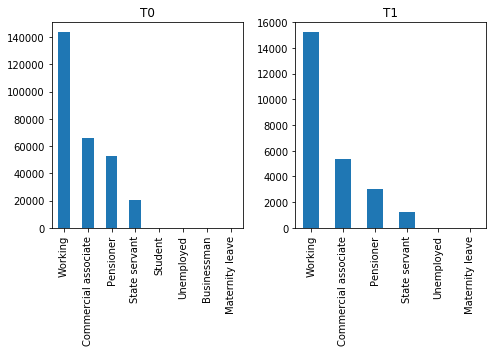

In [131]:
plt.figure(figsize = (7,5))
plt.subplot(1,2,1)
T0['NAME_INCOME_TYPE'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['NAME_INCOME_TYPE'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()
plt.show()

From the above plot we can observe that 'Working' profession people tend to more defaulters and at the same time tend to be not being defaulters. Overall 'Working' people are more in applying for loans.

##### 4) Univariate analysis of  NAME_EDUCATION_TYPE in both T0 and T1

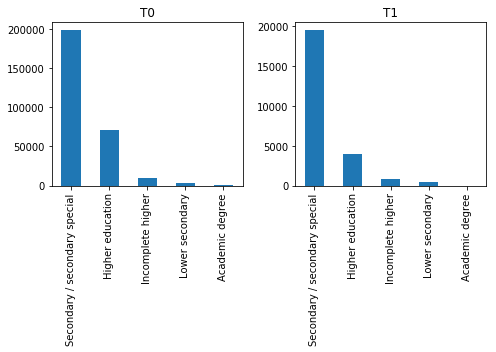

In [132]:
plt.figure(figsize= (7,5))
plt.subplot(1,2,1)
T0['NAME_EDUCATION_TYPE'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['NAME_EDUCATION_TYPE'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()
plt.show()

From the above plot we can observe that 'Secondary/secondary special' profession people tend to more defaulters and at the same time tend to be not being defaulters. Overall 'Secondary/secondary special' people are more in applying for loans.

##### 5) Univaraite analysis of NAME_FAMILY_STATUS in both T0 and T1

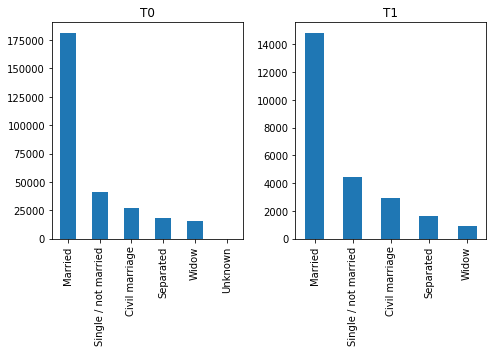

In [133]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
T0['NAME_FAMILY_STATUS'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['NAME_FAMILY_STATUS'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()
plt.show()

Married people are the ones who have applied more for loans. At the same time these Married people tend to be more defaulters as per T1. Also these Married people happen to be non defaulters also as per T0.

##### 6) Univariate analysis of  NAME_HOUSING_TYPE column in both T0 and T1

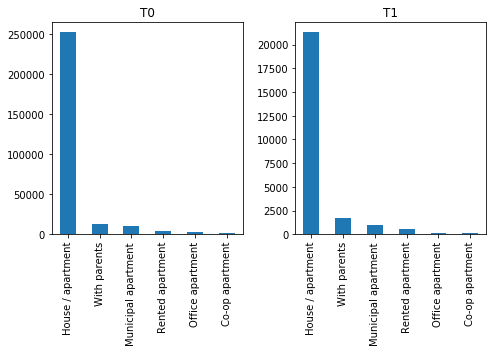

In [134]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
T0['NAME_HOUSING_TYPE'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['NAME_HOUSING_TYPE'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()
plt.show()

People living in House/apartment are the ones who apply for loans more. Also these people living in House/apartment tend to be the defaulters and at the same time these are the ones who become not to be defaulters.

##### 7) Univariate analysis of OCCUPATION_TYPE column in bothe T0 and T1

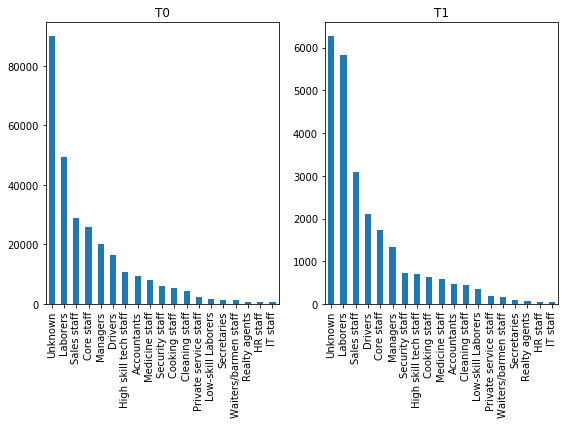

In [135]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
T0['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()
plt.show()

Apart from the Unknown, Laborers are the ones who apply for more loans at the same time they tend to be more defaulters. At the same time we can infer from T0 saying that these are the one who also belong to non defaulters category as well.

##### 8) Univariate analysis of CNT_CHILDREN in both T0 and T1

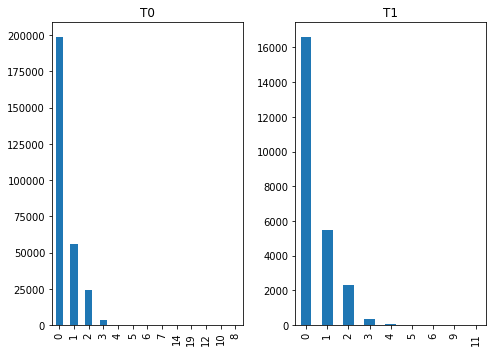

In [136]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
T0['CNT_CHILDREN'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['CNT_CHILDREN'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()
plt.show()

From the above plot we can see that couples with no children are the one are take more loans in both cases. At the same time these couples with no children are the one who faced some payment difficulties in the past. Also these couples with no children are the one who belong to category of all other cases or not defaulters.

__Conclusion of Univariate analysis on Categorical variables:__<br> In all the categorical univariate analysis we have seen that tha trend in variation between the values in categorical attributes is almost same for T0 and T1 dataframes. Although the shapes of dataframes are diferent but still the variation are almost same in respective categories.

## Correlation comparison of numerical varibles in both T0 and T1 dataframes.

In [137]:
# identification of numerical variables
numerical_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED']
numerical_columns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED']

##### Correlation matrix for T0

In [138]:
corr = T0[numerical_columns].corr()

In [139]:
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.sort_values(by = 'Correlation', ascending = False, inplace =True)
corrdf

,VAR1,VAR2,Correlation
22,AMT_GOODS_PRICE,AMT_CREDIT,0.98702
23,AMT_GOODS_PRICE,AMT_ANNUITY,0.77643
15,AMT_ANNUITY,AMT_CREDIT,0.77131
14,AMT_ANNUITY,AMT_INCOME_TOTAL,0.41895
47,DAYS_EMPLOYED,DAYS_BIRTH,0.35244
21,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.34943
7,AMT_CREDIT,AMT_INCOME_TOTAL,0.34280
28,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.16785
30,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.12099
31,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.10383


##### Correlation matrix for T1

In [140]:
corr1 = T1[numerical_columns].corr()

In [141]:
corr1df = corr1.where(np.triu(np.ones(corr1.shape), k =1).astype(np.bool)).unstack().reset_index()
corr1df.columns = ['VAR1', 'VAR2', 'Correlation']
corr1df.dropna(subset = ['Correlation'], inplace = True)
corr1df.sort_values(by = 'Correlation', ascending =False, inplace =True)
corr1df

,VAR1,VAR2,Correlation
22,AMT_GOODS_PRICE,AMT_CREDIT,0.98278
23,AMT_GOODS_PRICE,AMT_ANNUITY,0.75230
15,AMT_ANNUITY,AMT_CREDIT,0.75219
47,DAYS_EMPLOYED,DAYS_BIRTH,0.30670
38,DAYS_BIRTH,AMT_GOODS_PRICE,0.13553
36,DAYS_BIRTH,AMT_CREDIT,0.13507
45,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.11191
43,DAYS_EMPLOYED,AMT_CREDIT,0.10602
31,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.07605
30,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.07169


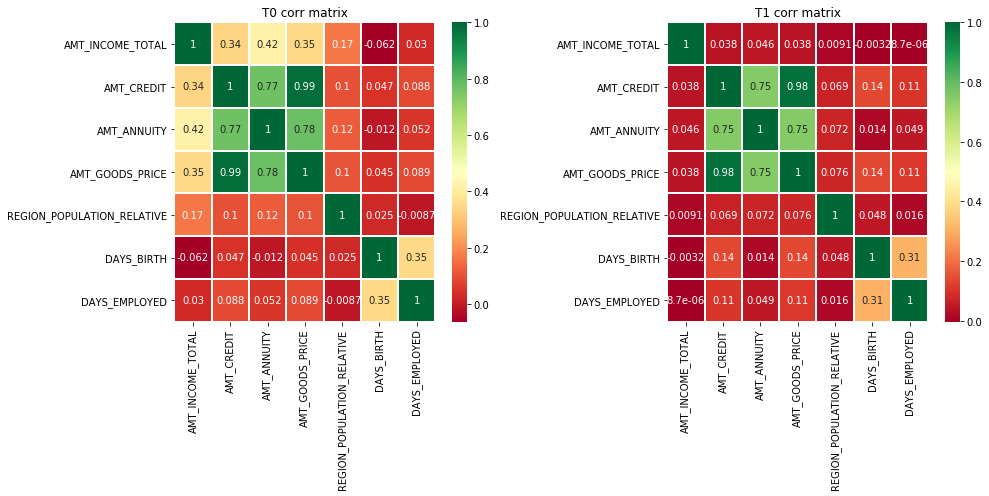

In [142]:
# plotting heat map for the corr matrix for both T0 and T1
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
sns.heatmap(corr, cmap = 'RdYlGn',annot =True, linewidths= 1, linecolor= 'White')
plt.title('T0 corr matrix')
plt.subplot(1,2,2)
sns.heatmap(corr1, annot =True, cmap ='RdYlGn', linewidths= 1, linecolor= 'white')
plt.title('T1 corr matrix')
plt.tight_layout()
plt.show()

###### Comparing top 10 Correlations between T0 and T1

In [143]:
#Top 10 correlations of T0
top10_corrdf = corrdf.head(10)
top10_corrdf

,VAR1,VAR2,Correlation
22,AMT_GOODS_PRICE,AMT_CREDIT,0.98702
23,AMT_GOODS_PRICE,AMT_ANNUITY,0.77643
15,AMT_ANNUITY,AMT_CREDIT,0.77131
14,AMT_ANNUITY,AMT_INCOME_TOTAL,0.41895
47,DAYS_EMPLOYED,DAYS_BIRTH,0.35244
21,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.34943
7,AMT_CREDIT,AMT_INCOME_TOTAL,0.34280
28,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.16785
30,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.12099
31,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.10383


In [144]:
# Top 10 correlations of T1
top10_corr1df = corr1df.head(10)
top10_corr1df

,VAR1,VAR2,Correlation
22,AMT_GOODS_PRICE,AMT_CREDIT,0.98278
23,AMT_GOODS_PRICE,AMT_ANNUITY,0.75230
15,AMT_ANNUITY,AMT_CREDIT,0.75219
47,DAYS_EMPLOYED,DAYS_BIRTH,0.30670
38,DAYS_BIRTH,AMT_GOODS_PRICE,0.13553
36,DAYS_BIRTH,AMT_CREDIT,0.13507
45,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.11191
43,DAYS_EMPLOYED,AMT_CREDIT,0.10602
31,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.07605
30,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.07169


#### Check between top10 T0 and top10 T1 ?

From the above top 10 correlations between T0 and T1 there exists few differneces in variables. Both are not completely same.

#### Check the variables with highest correlation are same in both T0 and T1 ?

From the above correlation dataframes and correlation matric we can see that the highest correlation variables are same in both T0 and T1 correlation dataframes although there are some slight variations between the variables among T0 and T1.

## Univariate analysis on numerical variables in both T0 and T1

In [145]:
numerical_columns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED']

##### 1) Univariate analysis of  'AMT_INCOME_TOTAL' column

__Note__:  'AMT_INCOME_TOTAL' column contains outliers after identification using IQR method previously. But due to high number of rows values as outliers they are not capped or dropped as it will result in biased results. Hence whensoever the column is considered their quantile values can be taken into consideriatoion.

In [146]:
# describe of 'AMT_INCOME_TOTAL' column in T0 dataframe
T0['AMT_INCOME_TOTAL'].describe()

count     282686.00000
mean      169077.72227
std       110476.26852
min        25650.00000
25%       112500.00000
50%       148500.00000
75%       202500.00000
max     18000090.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [147]:
# qunatile describe of 'AMT_INCOME_TOTAL' in T0
T0['AMT_INCOME_TOTAL'].quantile([0.25,0.50,0.75,0.90,0.95,0.99])

0.25000   112500.00000
0.50000   148500.00000
0.75000   202500.00000
0.90000   270000.00000
0.95000   337500.00000
0.99000   486000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [148]:
# describe of 'AMT_INCOME_TOTAL' in T1
T1['AMT_INCOME_TOTAL'].describe()

count       24825.00000
mean       165611.76091
std        746676.95944
min         25650.00000
25%        112500.00000
50%        135000.00000
75%        202500.00000
max     117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [149]:
# quantile description of 'AMT_INCOME_TOTAL' in T1
T1['AMT_INCOME_TOTAL'].quantile([0.25,0.50,0.75,0.90,0.95,0.99])

0.25000   112500.00000
0.50000   135000.00000
0.75000   202500.00000
0.90000   256500.00000
0.95000   315000.00000
0.99000   450000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

From the above quantile description it is clear that the difference between max value and 99th percentile is extremely high hence the analysis can be restricted upto 99th percentile incluing it as well. Box plot visualization can be used to analysis the variation in 'AMT_INCOME_TOTAL' column in both T0 and T1

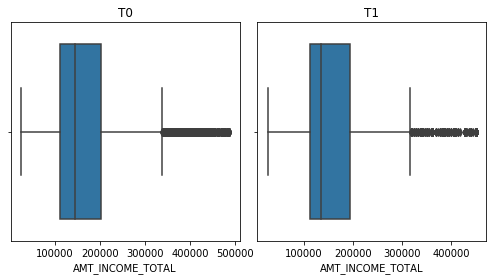

In [150]:
plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
sns.boxplot(T0.loc[T0['AMT_INCOME_TOTAL']<= (T0['AMT_INCOME_TOTAL'].quantile(0.99)), 'AMT_INCOME_TOTAL'])
plt.title('T0')
plt.subplot(1,2,2)
sns.boxplot(T1.loc[T1['AMT_INCOME_TOTAL']<= (T1['AMT_INCOME_TOTAL'].quantile(0.99)), 'AMT_INCOME_TOTAL'])
plt.title('T1')
plt.tight_layout()
plt.show()

__Inference from box plots__: From the above box plots for both T0 and T1 We can see that majority of the loan seekers are in the range of their income between 1L to 2L range and they happen to be the major part of the people who are DEFAULTERS. At the same time these are the income range people who are NOT BEING DEFAULTERS. Also from box plot we can see that there are even income range people above the whisker line who happens to be DEFAULTERS and NOT BEING DEFAULTERS.

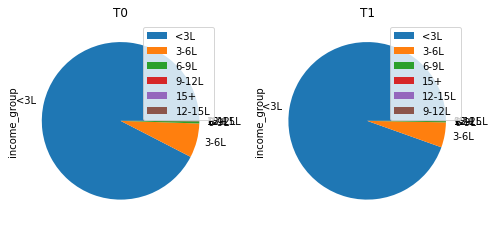

In [151]:
# plotting based on their income groups
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
T0['income_group'].value_counts().plot.pie()
plt.title('T0')
plt.legend(loc = 0)
plt.subplot(1,2,2)
T1['income_group'].value_counts().plot.pie()
plt.title('T1')
plt.legend(loc = 0)
plt.tight_layout()
plt.show()

__Inference__: The same inference can be given from the above plot as well. Majority loan seekers fall under the category of <3L more precisely falls under the category of inbetween 1-2L.

##### 2) univariate analysis of  'DAYS_BIRTH' column in both T0 and T1

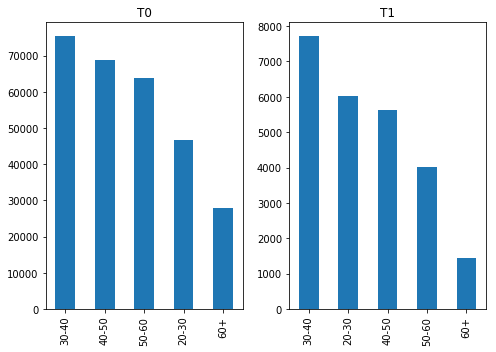

In [152]:
plt.figure(figsize = (7,5))
plt.subplot(1,2,1)
T0['age_group'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['age_group'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()
plt.show()

From the above plot we can see that majority of the loan seekers are of the age group 30-40. At the same time these are the age groups who fall under the category of defaulters. Also these age groups fall under the category of all other catgeories you can be non defaulters as well as per T0 plot.

##### 3) univariate analysis of  'DAYS_EMPLOYED' in both T0 and T1

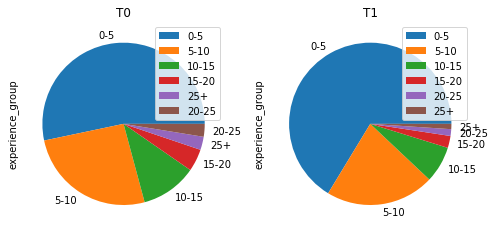

In [153]:
plt.figure(figsize= (7,5))
plt.subplot(1,2,1)
T0['experience_group'].value_counts().plot.pie()
plt.title('T0')
plt.legend(loc = 0)
plt.subplot(1,2,2)
T1['experience_group'].value_counts().plot.pie()
plt.title('T1')
plt.legend(loc =0)
plt.tight_layout()
plt.show()

__Inference__: From the above plots we can observe that experience group 0-5 years range people are the majority loan seekers. At the same type the people of this range fall under the category of defaulters or with payment difficultie in the past. Also these range people fall under the category belonging to all other categories or non defaulters.

##### 4) univariate analysis of  AMT_CREDIT

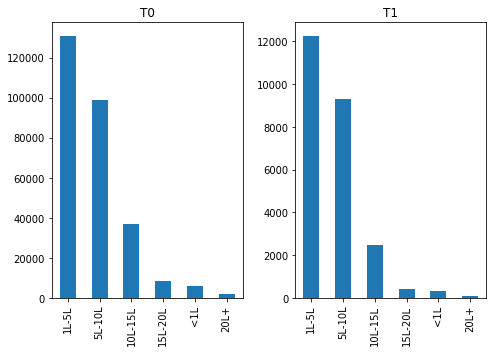

In [154]:
plt.figure(figsize= (7,5))
plt.subplot(1,2,1)
T0['credit_group'].value_counts().plot.bar()
plt.title('T0')
plt.subplot(1,2,2)
T1['credit_group'].value_counts().plot.bar()
plt.title('T1')
plt.tight_layout()
plt.show()

From the above we can see that majority of the clients have come for loans in between 1-5L range. At the same time people you have taken loan for 1-2L are the one who faced some payment difficulties in their past and also they belong to all other categories as well meaning either may fall under non defaulters category.

## Bivariate analysis in both T0 and T1

#### Numeric - Numeric analysis :
Analysis can be carried out using Scatter plots, pair plot or Correlation matrix.

###### 1)  AMT_INCOME_TOTAL vs. AMT_CREDIT

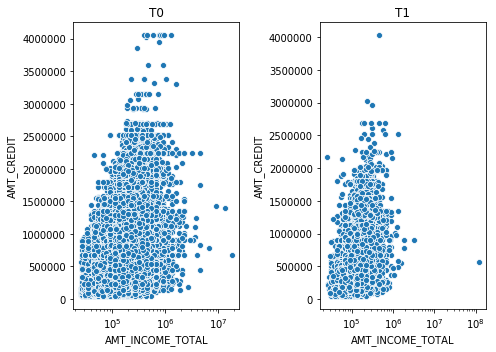

In [155]:
plt.figure(figsize= (7,5))
plt.subplot(1,2,1)
sns.scatterplot(x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT',data = T0)
plt.xscale('log')
plt.title('T0')
plt.subplot(1,2,2)
sns.scatterplot(x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', data = T1)
plt.xscale('log')
plt.title('T1')
plt.tight_layout()
plt.show()

__Inference__: From the above scatter plot we can see that there is no much variation between the paramters. Only a small portion of income range people are applying for the loans and the loans credit amount also lies in the small lower values of credit amount. Although there exists few high values of credit amount but the majority of the credit amount issued lies in the lower range and that to the lower range of lower income people. Those set of range people only have faced some payment issues in their past and some belong to all other categories or non defaulters.

##### checking using correlation matrix

In [156]:
corr_matrix = T0[['AMT_INCOME_TOTAL','AMT_CREDIT']].corr()
corr_matrix

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.00000,0.34280
AMT_CREDIT,0.34280,1.00000


In [157]:
corr1_matrix = T1[['AMT_INCOME_TOTAL','AMT_CREDIT']].corr()
corr1_matrix

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.00000,0.03813
AMT_CREDIT,0.03813,1.00000


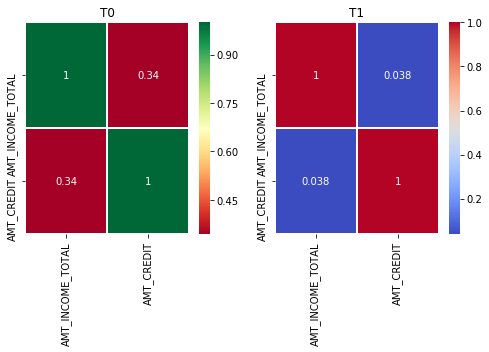

In [158]:
plt.figure(figsize= (7,5))
plt.subplot(1,2,1)
sns.heatmap(corr_matrix, annot = True, cmap = 'RdYlGn', linewidths= 1, linecolor= 'white')
plt.title('T0')
plt.subplot(1,2,2)
sns.heatmap(corr1_matrix, annot = True, cmap = 'coolwarm', linecolor= 'white', linewidths= 1)
plt.title('T1')
plt.tight_layout()
plt.show()

From the heatmap we can see that there exists very small correlation score between the parameters.

##### 2) AMT_CREDIT vs. AMT_ANNUITY

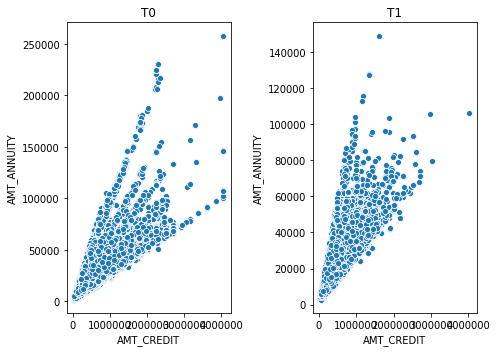

In [159]:
plt.figure(figsize = (7,5))
plt.subplot(1,2,1)
sns.scatterplot(data = T0, x ='AMT_CREDIT', y= 'AMT_ANNUITY')
plt.title('T0')
plt.subplot(1,2,2)
sns.scatterplot(data = T1, x ='AMT_CREDIT', y= 'AMT_ANNUITY')
plt.title('T1')
plt.tight_layout()
plt.show()

__Inference__: From the above plot we can see that there is an linear increasing variation between the parameters. It is natural that as the amount credited increases accordingly amount annuity also increases.

### Categorical - Numerical analysis

###### 1) NAME_CONTRACT_TYPE vs. AMT_INCOME_TOTAL

As we are familiar that AMT_INCOME_TOTAL has outliers in that. Hence it is better to consider the estiamtor of the variable to be median rather than mean. As due to presenece of outliers mean will be affected.

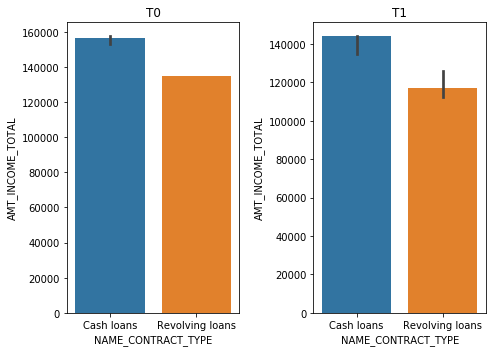

In [160]:
plt.figure(figsize= (7,5))
plt.subplot(1,2,1)
sns.barplot(data =  T0, x = 'NAME_CONTRACT_TYPE', y = 'AMT_INCOME_TOTAL', estimator= np.median)
plt.title('T0')
plt.subplot(1,2,2)
sns.barplot(data=  T1, x = 'NAME_CONTRACT_TYPE', y = 'AMT_INCOME_TOTAL', estimator= np.median )
plt.title('T1')
plt.tight_layout()
plt.show()

__Inference__: From the above plot we can see that cash loans took by the people having an income range of about 1.5L tend to be more defaulters and revolving loans took by the people having an income range of about 1.2L tend to be the defaulters.

##### 2) Income group vs. AMT_CREDIT

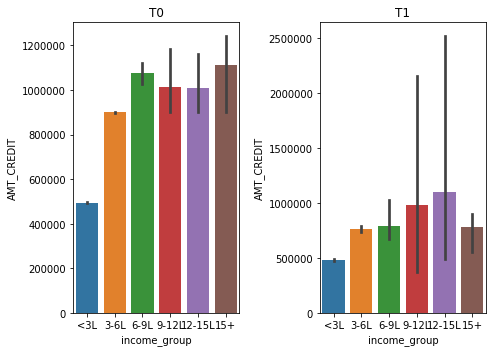

In [161]:
plt.figure(figsize= (7,5))
plt.subplot(1,2,1)
sns.barplot(data = T0, x = 'income_group', y = 'AMT_CREDIT', estimator = np.median)
plt.title('T0')
plt.subplot(1,2,2)
sns.barplot(data =T1, x = 'income_group', y = 'AMT_CREDIT', estimator = np.median )
plt.title('T1')
plt.tight_layout()
plt.show()

__Inference__: From the above plot we can see that there exists defaulters in every income group but among them majorly people under the income category 12-15L tend to be more defaulters to their respestive credit amounts. At the same time the same income group also falls under the category of non defaulters.

##### Further more bivariate analysis of categorical vs. numerical using segmented dataframe

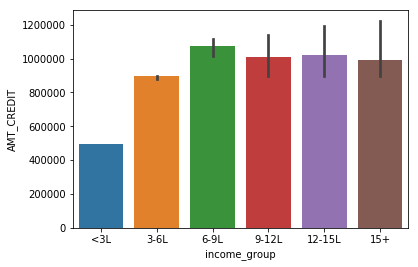

In [162]:
# analyzing income_group vs. AMT_CREDIT
sns.barplot(data= app_data1, x = 'income_group', y = 'AMT_CREDIT', estimator=np.median)

__Inference__: From the above plot we can see that income group people between 6-9L tend to take more loans when compared to other income category people although in other income category groups also there exists almost equal number of loan seekers. Now lets further examine in which income group does more number of defaulters exists.

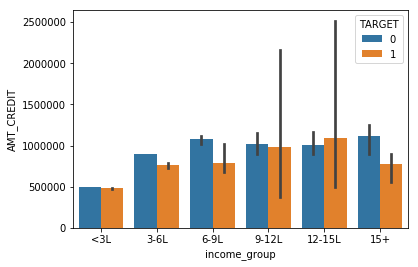

In [163]:
# analyzing the income_group vs. AMT_CREDIT
sns.barplot(data =app_data1, x = 'income_group', y = 'AMT_CREDIT', estimator = np.median, hue = 'TARGET')

__Inference__: From the above plot we can see that people belonging to income group of less than 3L taking an credit amount of about 5L tend to be the defaulters. Also people belonging to income group of 12-15L taking an credit amount of about 10-12L also tend to be the defaulters. But among all people belonging to income group 12-15L of loan credit amount of about 10-12L tend be the highest defaulters.

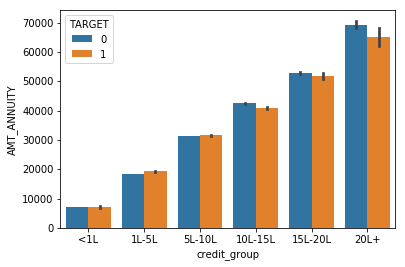

In [164]:
# analyzing credit_group vs. AMT_ANNUITY
sns.barplot(data =app_data1, x = 'credit_group', y = 'AMT_ANNUITY', estimator = np.mean, hue = 'TARGET')

__Inference__: From the above plot we can see that people taking an loan credit amount of less than 1L, 1-5L and 5-10L paying their respective annuity amounts of about 10K, ~20K, ~30K tend to be more defaulters. At the same time we can also infer that in every credit group paying their respective annuity amounts tends to be defaulters.

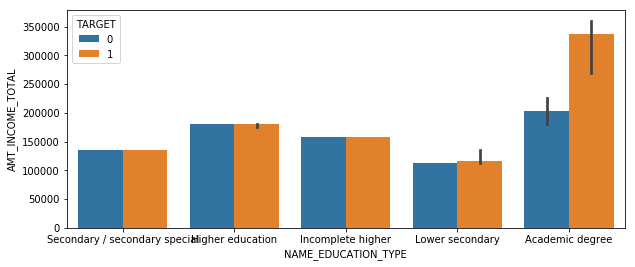

In [165]:
plt.figure(figsize= (10,4))
sns.barplot(data = app_data1, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', estimator = np.median, hue = 'TARGET')

__Inference__: From the above plot we can see that people with Academic degree earning salary of about 3-3.5L tend to fall under the category of defaulters list.

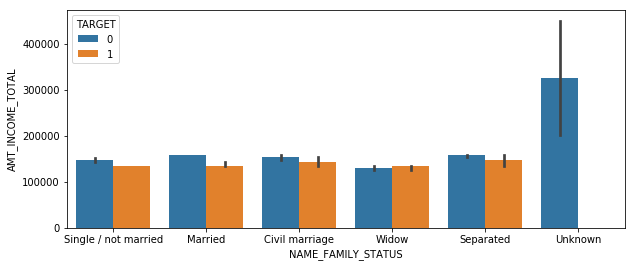

In [166]:
# analyzing NAME_FAMILY_STATUS vs. AMT_INCOME_TOTAL
plt.figure(figsize= (10,4))
sns.barplot(data =app_data1, x = 'NAME_FAMILY_STATUS', y = 'AMT_INCOME_TOTAL', estimator = np.median, hue = 'TARGET')
plt.show()

__Inference__: From the above plot people belonging to Widow category earning an income of about 1-2L tend to be the defaulters more. At the same time we can alos infer that people belonging to all other categories of marital status also have alomst significant amount of defaulters wrt their respective amount of salaries.

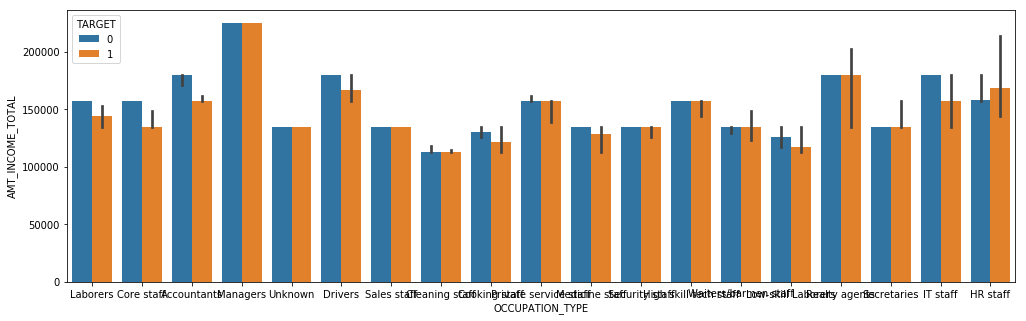

In [167]:
# analyzing  OCCUPATION_TYPE vs. AMT_INCOME_TOTAL
plt.figure(figsize= (17,5))
sns.barplot(data = app_data1, x = 'OCCUPATION_TYPE', y = 'AMT_INCOME_TOTAL', estimator = np.median, hue = 'TARGET')

__Inference__: The above plot gives us information of which occupation category earning how much tend to be the defaulters. Therefore from the plot we can see that among all HR staff employees earning an income of about 1.5-2L tend to be more defaulters. At the same time we can also infer that in almost all the categories of occupation there exists significant number of defaulters at their respective incomes.

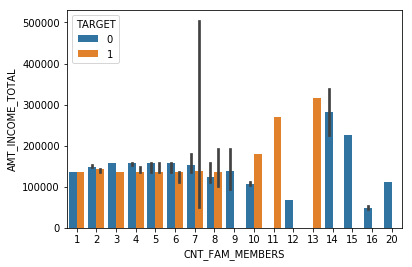

In [168]:
# analyzing CNT_FAM_MEMBERS vs. AMT_INCOME_TOTAL
sns.barplot(data= app_data1, x = 'CNT_FAM_MEMBERS', y = 'AMT_INCOME_TOTAL', estimator = np.median, hue = 'TARGET')

__Inference__: The above plot gives us information of which family size earning their respective incomes tend to be defaulters. Therefore from the above plot we can see that people having a family size of 11 and 13 having total income of about 3L tend to be more defaulters. It is natural that people having such huge families and having low incomes tend to be defaulters.

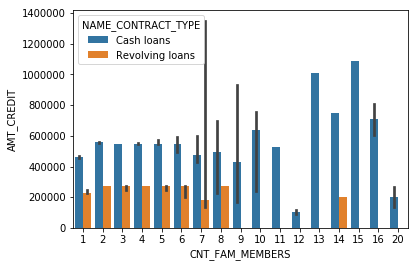

In [169]:
# analyzing 'CNT_FAM_MEM' vs. 'AMT_CREDITED'
sns.barplot(data = app_data1, x = 'CNT_FAM_MEMBERS', y = 'AMT_CREDIT', estimator= np.median, hue = 'NAME_CONTRACT_TYPE')

__Inference__: The above plot gives us information of about which family size people have opted how much credit amount and its type of loan. Therefore we can see that majorily people belonging to family size of about 13 and 15 have applied for more credit amount of about 1L respectively. That too they have applied for cash loans.

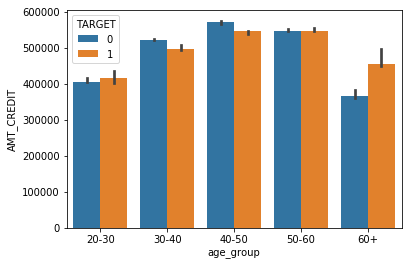

In [170]:
# analyzing age_group vs. AMT_CREDIT
sns.barplot(data =app_data1, x = 'age_group', y = 'AMT_CREDIT', estimator= np.median, hue='TARGET')

__Inference__: The above plot gives information about which age group has applied for how much credit amount and also which age group tend to be defaulters. Therefore we can see that people belonging to age group of 20-30 opted for loan credit amount of about 40K tend to be defaulters. Also people belonging to age group of 60+ opting loan credit amount of around 45K tend be also defaulters. At the same time we can also infer that there exists significant number of defaulters in every age group having respective credit amounts.

### categorical - categorical bivariate analysis

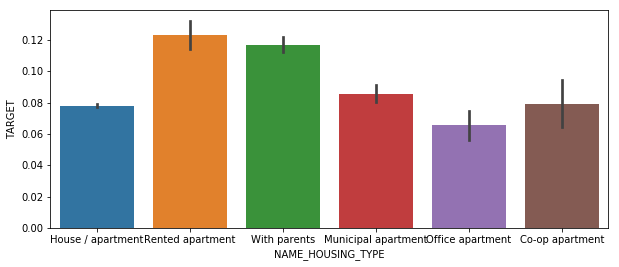

In [171]:
# analyzing NAME_HOUSING_TYPE vs. TARGET as the response flag
plt.figure(figsize= (10,4))
sns.barplot(data = app_data1, x = 'NAME_HOUSING_TYPE', y = 'TARGET', estimator= np.mean )

__Inference__: From the above plot we can see that Rented apartment people tend to be more defaulters when compared to others.

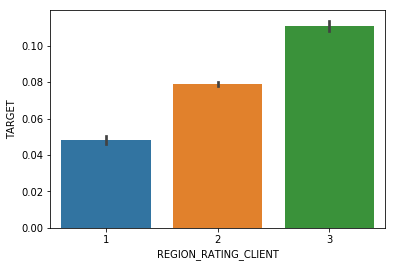

In [172]:
# analyzing REGION_RATING_CLIENT vs. TARGET as an response flag
sns.barplot(data = app_data1, x = 'REGION_RATING_CLIENT', y = 'TARGET', estimator= np.mean)

__Inference__: From the above plot we can see that people belonging to 3 rating region tend to be more defaulters.

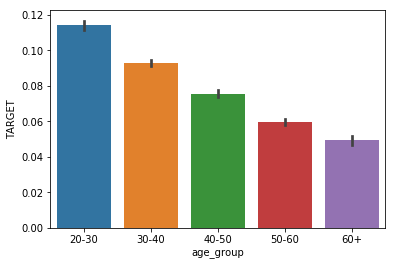

In [173]:
# analyzing 'age_group' vs TARGET as flag variable
sns.barplot(data =app_data1, x = 'age_group', y = 'TARGET', estimator= np.mean)

__Inference__: People of age group 20-30 tend to be more defaulters.

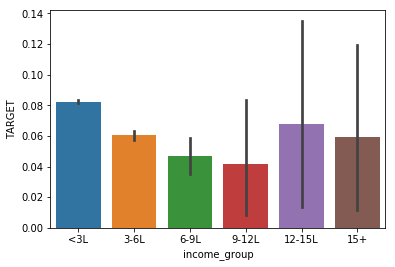

In [174]:
# analyzing income_group vs TARGET as flag variable
sns.barplot(data = app_data1, x = 'income_group', y = 'TARGET', estimator=np.mean)

__Inference__: People having income less than 3L tend to be more defaulters as it is natural that people with low income tend to be more defaulters.

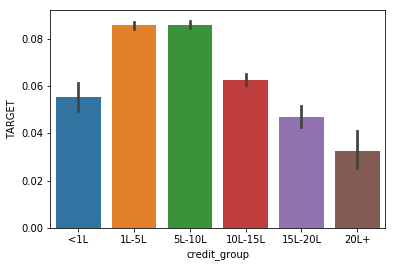

In [175]:
# analyzing credit_group vs. TARGET as a flag variable
sns.barplot(data = app_data1, x = 'credit_group', y ='TARGET', estimator= np.mean)

__Inference__: People issued with credit amount 1-5L and 5-10L tend to be more defaulters.

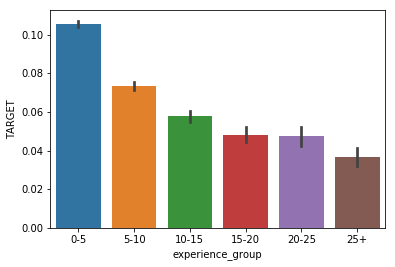

In [176]:
# analyzing experience_group vs. TARGET as a flag variable
sns.barplot(data = app_data1, x = 'experience_group', y = 'TARGET', estimator= np.mean)

__Inference__: People with 0-5 years experience tend to be more defaulters as it is natural that in the initial stages of employement the income would be less hence it will be difficult to meet expenses and installments.

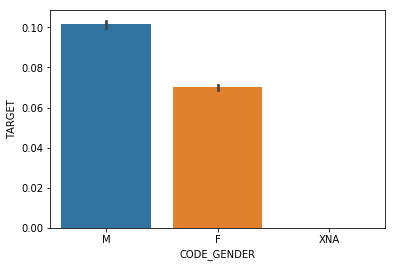

In [177]:
# analyzing CODE_GENDER vs. TARGET
sns.barplot(data =app_data1, x = 'CODE_GENDER', y= 'TARGET', estimator= np.mean)

__Inference__: Males tend to be more defaulters when compared to Females.

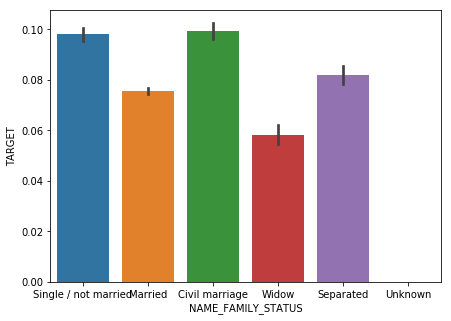

In [178]:
# analyzing  NAME_FAMILY_STATUS vs TARGET
plt.figure(figsize= (7,5))
sns.barplot(data = app_data1, x = 'NAME_FAMILY_STATUS', y = 'TARGET', estimator= np.mean)

__Inference__: From the above plot we can see that people who are Single and Civil Married tend to be more defaulters.

__General Conclusions from bivariate analysis__:<br>
1) Amount credit and Amount annuity are strongly correlated to each other.<br>
2) Overall Males tends to be more defaulters when compared to Females.<br>
3) People having 0-5 year experience tend to be more defaulters.<br>
4) People issued with loan credit amount between 1-5L and 5-10L tend to be defaulters.<br>
5) People having income less than 3L tend to be more defaulters.<br>
6) People belonging to age group of 20-30 tend be defaulters.<br>
7) People living in regional rating of 3 as rated by the firm tend to be more defaulters than other regions.<br>
8) People living in rented apartments tends to be more defaulters.<br>
9) People with marital status as Singles and Civil Marriage tend to be more defaulters.

__Specific conclusions from bivariate analysis__:<br>
1) People belonging to age group 20-30 and 60+ being issued with loan credit amount of around 40K and 45K tend to be more defaulters.<br>
2) Majority of the people have applied for the cash loans rather revolving loans.<br>
3) People having family sizes of about 11 and 13 having income in the range of 3-4L tend to be more defaulters.<br>
4) People having an occupation type of HR staff and having total income of abour 1.5L tend to be more defaulters.<br>
5) People having marital status as Widow and having an income about 2L tend to be more defaulters. <br>
6) People having education qualification of Academic degree and having an income of about 3.5L tend to be more defaulters among all other education categories.<br>
7) People belonging to the loan credit amount of about <1L, 1-5L, 5-10L paying annuity amounts of about ~10k, 20K, 30K respectively tend to be more defaulters.

## Previous dataframe check

### Reading and analyzing the dataframe

In [179]:
# analyzing the previous application
pre_appdata = pd.read_csv(r'previous_application.csv')
pre_appdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,Y,1,0.00000,0.18283,0.86734,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,nan,607500.00000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,nan,112500.00000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,nan,450000.00000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,nan,337500.00000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


### Checking the structure of the pre_app_data

In [180]:
# analyzing the shape of the dataframe
pre_appdata.shape

(1048575, 37)

In [181]:
# analyzing the data types of the data
pre_appdata.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [182]:
#analyzing the describe of the data
pre_appdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1048575.00000,1048575.00000,815566.00000,1048575.00000,1048575.00000,489179.00000,807610.00000,1048575.00000,1048575.00000,489179.00000,3721.00000,3721.00000,1048575.00000,1048575.00000,815569.00000,627867.00000,627867.00000,627867.00000,627867.00000,627867.00000,627867.00000
mean,1922775.38202,278436.74617,15891.26515,174269.76942,195000.01172,6700.77753,226289.22496,12.48486,0.99641,0.07962,0.18718,0.77492,-882.03806,318.39042,15.99564,342387.34620,13833.80203,33614.93090,76591.06143,81985.70166,0.33153
std,532936.56935,102856.88999,14745.55744,291078.87239,316940.67068,20785.69534,313448.95663,3.33314,0.05979,0.10788,0.08334,0.09951,779.26489,7996.73355,14.50811,88595.44159,72460.12645,106643.96078,149653.05385,153298.88725,0.47076
min,1000001.00000,100001.00000,0.00000,0.00000,0.00000,-0.90000,0.00000,0.00000,0.00000,-0.00001,0.03478,0.37315,-2922.00000,-1.00000,0.00000,-2921.00000,-2892.00000,-2801.00000,-2889.00000,-2874.00000,0.00000
25%,1460641.50000,189386.00000,6301.35000,18900.00000,24277.50000,0.00000,50580.00000,10.00000,1.00000,0.00000,0.16072,0.71564,-1303.00000,-1.00000,6.00000,365243.00000,-1626.00000,-1241.00000,-1313.00000,-1269.00000,0.00000
50%,1923419.00000,278810.00000,11250.00000,70816.50000,80253.00000,1624.50000,111511.57500,12.00000,1.00000,0.05106,0.18912,0.83510,-583.00000,4.00000,12.00000,365243.00000,-830.00000,-361.00000,-537.00000,-498.00000,0.00000
75%,2384447.50000,367744.50000,20523.00375,180000.00000,215239.50000,7749.00000,229500.00000,15.00000,1.00000,0.10891,0.19333,0.85254,-281.00000,85.00000,24.00000,365243.00000,-410.00000,128.00000,-74.00000,-44.00000,1.00000
max,2845382.00000,456255.00000,418058.14500,6905160.00000,6905160.00000,2150100.00000,6905160.00000,23.00000,1.00000,0.98974,1.00000,1.00000,-2.00000,4000000.00000,84.00000,365243.00000,365243.00000,365243.00000,365243.00000,365243.00000,1.00000


In [183]:
# analyzing the info of the data
pre_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

##### filtering the pre_app_data based on NFLAG_LAST_APPL_IN_DAY and  FLAG_LAST_APPL_PER_CONTRACT

Column descriptions<br><br>FLAG_LAST_APPL_PER_CONTRACT: Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract<br><br>NFLAG_LAST_APPL_IN_DAY: Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice

As per above column descriptions it is better to consider only the rows which have FLAG_LAST_APPL_PER_CONTRACT equals to 'Y' and NFLAG_LAST_APPL_IN_DAY equals to 1. Because it is neccesary to consider only an last application in both the cases.

In [184]:
pre_appdata = pre_appdata[(pre_appdata['NFLAG_LAST_APPL_IN_DAY'] == 'Y') | (pre_appdata['NFLAG_LAST_APPL_IN_DAY'] == 1)]

In [185]:
# analyzing the shape of the pre_app_data after filteration
pre_appdata.shape

(1044813, 37)

On comparison we can see that there has been decrease in rows. Initially there use to 10,48,575 and now there are 10,44,813 rows.

In [186]:
# analyzing the dataframe after filteration
pre_appdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,Y,1,0.00000,0.18283,0.86734,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,nan,607500.00000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,nan,112500.00000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,nan,450000.00000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,nan,337500.00000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


### Checking the null value percentage in pre_appdata

In [187]:
round(100*(pre_appdata.isnull().sum()/len(pre_appdata.index)),2)

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_ANNUITY                   22.30000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00000
AMT_DOWN_PAYMENT              53.20000
AMT_GOODS_PRICE               22.86000
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
RATE_DOWN_PAYMENT             53.20000
RATE_INTEREST_PRIMARY         99.64000
RATE_INTEREST_PRIVILEGED      99.64000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_TYPE_SUITE               49.03000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE             

In [188]:
# identifying the columns with null percentage >35% and dropping them
columns_list1 = list(pre_appdata.columns)
null_columns_list1 = []
for i in columns_list1:
    if round(100*(pre_appdata[i].isnull().sum()/len(pre_appdata.index)),2) > 35:
        null_columns_list1.append(i)
null_columns_list1

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

__Inference about columns having greater null percentages__: It is not neccessary to be taken into consideration for the columns having greater null values as no insights can be gathered from those columns hence it is better to drop them. Rather than dropping we segment the dataframe just by considering only the columns which have null percentage less than 35%. Later we can further segment the dataframe confined to our analysis.

In [189]:
# Identifying the columns having null values less than 32%
required_columns_list1 = []
for i in columns_list1:
    if round(100*(pre_appdata[i].isnull().sum()/len(pre_appdata.index)), 2) < 35:
        required_columns_list1.append(i)
required_columns_list1

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [190]:
# checking the null values percentage for the columns less than 35
round(100*(pre_appdata[required_columns_list1].isnull().sum()/len(pre_appdata)),2)

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_ANNUITY                   22.30000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00000
AMT_GOODS_PRICE               22.86000
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE                   0.00000
SELLERPLACE_AREA               0.00000
NAME_SELLER_INDUSTRY           0.00000
CNT_PAYMENT                   22.30000
NAME_YIELD_GROUP               0.00000
PRODUCT_COMBINATION      

### Treating the missing values

##### Treating missing values in AMT_ANNUITY

In [191]:
# analyzing the column
pre_appdata['AMT_ANNUITY'].describe()

count   811815.00000
mean     15911.88657
std      14758.92436
min          0.00000
25%       6311.79000
50%      11250.00000
75%      20547.99000
max     418058.14500
Name: AMT_ANNUITY, dtype: float64

From the above describe we can see that the difference between mean and median is close enough. Also the values have continous increment between the quantile values. The difference between max value and the 75th percentile is little high. Let's further analyze by plotting box plot before taking any informed decision.

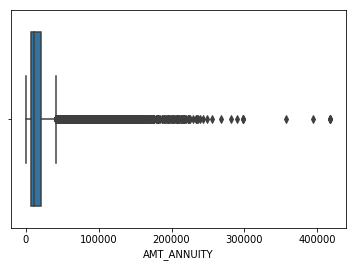

In [192]:
# plotting box plot
sns.boxplot(pre_appdata['AMT_ANNUITY'])

From the above plot we see that there exists some considerable high values. Hence it is better to impute the missing values with median value.

In [193]:
# treating the missing values in AMT_ANNUITY
pre_appdata.loc[pre_appdata['AMT_ANNUITY'].isnull(), 'AMT_ANNUITY'] = pre_appdata['AMT_ANNUITY'].median()

In [194]:
# checking the null values after treatment.
pre_appdata['AMT_ANNUITY'].isnull().sum()

0

##### treating missing values in  AMT_GOODS_PRICE

In [195]:
# analyzing the column
pre_appdata['AMT_GOODS_PRICE'].describe()

count    805924.00000
mean     226037.81645
std      313474.01451
min           0.00000
25%       50445.00000
50%      111132.00000
75%      229500.00000
max     6905160.00000
Name: AMT_GOODS_PRICE, dtype: float64

From the above describe we can see that there exists huge difference between mean and median. Also the difference between max value and the 75th precentile is alsao more. It is an indication of presence of outliers. Let's further more confirm by plotting box plot to see the variaton of the points.

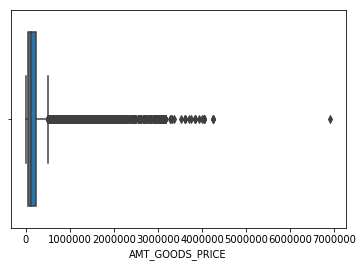

In [196]:
# plotting box plot
sns.boxplot(pre_appdata['AMT_GOODS_PRICE'])

From the above plot we can see that the main body has been compressed and there exists some continous high values above the whisker line. These are just high values. Hence it is better to impute the missing values using median as median is not affected by the high values.

In [197]:
# treating the missing values
pre_appdata.loc[pre_appdata['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE'] = pre_appdata['AMT_GOODS_PRICE'].median()

In [198]:
# checking the count of missing values after imputation
pre_appdata['AMT_GOODS_PRICE'].isnull().sum()

0

##### Treating missing values in CNT_PAYMENT

In [199]:
# analyzing the column
pre_appdata['CNT_PAYMENT'].head()

0   12.00000
1   36.00000
2   12.00000
3   12.00000
4   24.00000
Name: CNT_PAYMENT, dtype: float64

In [200]:
# checking the value counts
pre_appdata['CNT_PAYMENT'].value_counts()

12.00000    202995
6.00000     120157
10.00000     89488
0.00000      87615
24.00000     86587
18.00000     48771
36.00000     45308
60.00000     33219
48.00000     29356
8.00000      19159
4.00000      17025
30.00000     10436
14.00000      5102
42.00000      4419
16.00000      3655
5.00000       2473
54.00000      1305
20.00000      1121
7.00000        895
9.00000        797
3.00000        677
15.00000       573
11.00000       422
72.00000        80
17.00000        30
13.00000        29
84.00000        25
22.00000        23
23.00000        18
28.00000         7
26.00000         7
19.00000         6
66.00000         6
32.00000         4
35.00000         4
29.00000         3
59.00000         3
34.00000         2
38.00000         2
47.00000         2
44.00000         2
39.00000         1
21.00000         1
41.00000         1
45.00000         1
46.00000         1
33.00000         1
40.00000         1
Name: CNT_PAYMENT, dtype: int64

In [201]:
# treating the missing values with the most frequent value
pre_appdata.loc[pre_appdata['CNT_PAYMENT'].isnull(),'CNT_PAYMENT'] = 12

In [202]:
# checking the count of missing values after treatment
pre_appdata['CNT_PAYMENT'].isnull().sum()

0

##### treating missing values in PRODUCT_COMBINATION

In [203]:
# analyzing the column
pre_appdata['PRODUCT_COMBINATION'].head()

0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

In [204]:
# value counts of the colunmn
pre_appdata['PRODUCT_COMBINATION'].value_counts()

Cash                              178352
POS household with interest       166799
POS mobile with interest          139133
Cash X-Sell: middle                89676
Cash X-Sell: low                   80820
Card Street                        70126
POS industry with interest         62464
POS household without interest     52728
Card X-Sell                        47995
Cash Street: high                  37210
Cash X-Sell: high                  36779
Cash Street: middle                21600
Cash Street: low                   21163
POS mobile without interest        15174
POS other with interest            15061
POS industry without interest       7853
POS others without interest         1656
Name: PRODUCT_COMBINATION, dtype: int64

In [205]:
# treating the missing values in PRODUCT_COMBINATION
pre_appdata.loc[pre_appdata['PRODUCT_COMBINATION'].isnull(),'PRODUCT_COMBINATION'] = 'Cash'

In [206]:
# checking the count of missing values after imputation
pre_appdata['PRODUCT_COMBINATION'].isnull().sum()

0

In [207]:
# checking the null percentages after imputaion
round(100*(pre_appdata[required_columns_list1].isnull().sum() /len(pre_appdata)),2)

SK_ID_PREV                    0.00000
SK_ID_CURR                    0.00000
NAME_CONTRACT_TYPE            0.00000
AMT_ANNUITY                   0.00000
AMT_APPLICATION               0.00000
AMT_CREDIT                    0.00000
AMT_GOODS_PRICE               0.00000
WEEKDAY_APPR_PROCESS_START    0.00000
HOUR_APPR_PROCESS_START       0.00000
FLAG_LAST_APPL_PER_CONTRACT   0.00000
NFLAG_LAST_APPL_IN_DAY        0.00000
NAME_CASH_LOAN_PURPOSE        0.00000
NAME_CONTRACT_STATUS          0.00000
DAYS_DECISION                 0.00000
NAME_PAYMENT_TYPE             0.00000
CODE_REJECT_REASON            0.00000
NAME_CLIENT_TYPE              0.00000
NAME_GOODS_CATEGORY           0.00000
NAME_PORTFOLIO                0.00000
NAME_PRODUCT_TYPE             0.00000
CHANNEL_TYPE                  0.00000
SELLERPLACE_AREA              0.00000
NAME_SELLER_INDUSTRY          0.00000
CNT_PAYMENT                   0.00000
NAME_YIELD_GROUP              0.00000
PRODUCT_COMBINATION           0.00000
dtype: float

### Segmenting pre_appdata

In [208]:
pre_appdata1 = pre_appdata[required_columns_list1]

In [209]:
# checking the shape of pre_appdata1
pre_appdata1.shape

(1044813, 26)

## Merging of previous application and current application

In [210]:
# analying app_data1
app_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,credit_group,age_group,experience_group,income_group
0,100002,1,Cash loans,M,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,25,1.70000,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,2.00000,2.00000,2.00000,1L-5L,20-30,0-5,<3L
1,100003,0,Cash loans,F,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,State servant,Higher education,Married,House / apartment,0.00354,45,3.30000,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,1.00000,0.00000,1.00000,0.00000,10L-15L,40-50,0-5,<3L
2,100004,0,Revolving loans,M,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,52,0.60000,Laborers,1,2,2,MONDAY,0,0,0,0,0,0,Government,0.00000,0.00000,0.00000,0.00000,1L-5L,50-60,0-5,<3L
3,100006,0,Cash loans,F,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,52,8.30000,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,0.00000,2.00000,0.00000,1L-5L,50-60,5-10,<3L
4,100007,0,Cash loans,M,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,54,8.30000,Core staff,1,2,2,THURSDAY,0,0,0,0,1,1,Religion,0.00000,0.00000,0.00000,0.00000,5L-10L,50-60,5-10,<3L


In [211]:
# analyzing pre_appdata1
pre_appdata1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,17145.00000,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,607500.00000,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,112500.00000,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,450000.00000,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,337500.00000,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high


In [212]:
merge_data = pd.merge(app_data1, pre_appdata1, how= 'inner', on = 'SK_ID_CURR')

In [213]:
# analyzing the merge_data
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,credit_group,age_group,experience_group,income_group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,25,1.70000,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,2.00000,2.00000,2.00000,1L-5L,20-30,0-5,<3L,1038818,Consumer loans,9251.77500,179055.00000,179055.00000,179055.00000,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.00000,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,State servant,Higher education,Married,House / apartment,0.00354,45,3.30000,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,1.00000,0.00000,1.00000,0.00000,10L-15L,40-50,0-5,<3L,1810518,Cash loans,98356.99500,900000.00000,1035882.00000,900000.00000,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,State servant,Higher education,Married,House / apartment,0.00354,45,3.30000,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,1.00000,0.00000,1.00000,0.00000,10L-15L,40-50,0-5,<3L,2636178,Consumer loans,64567.66500,337500.00000,348637.50000,337500.00000,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.00000,middle,POS industry with interest
3,100004,0,Revolving loans,M,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,52,0.60000,Laborers,1,2,2,MONDAY,0,0,0,0,0,0,Government,0.00000,0.00000,0.00000,0.00000,1L-5L,50-60,0-5,<3L,1564014,Consumer loans,5357.25000,24282.00000,20106.00000,24282.00000,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.00000,middle,POS mobile without interest
4,100006,0,Cash loans,F,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,52,8.30000,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,2.00000,0.00000,2.00000,0.00000,1L-5L,50-60,5-10,<3L,2078043,Cash loans,24246.00000,675000.00000,675000.00000,675000.00000,THURSDAY,15,Y,1,XNA,Approved,-181,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.00000,low_normal,Cash X-Sell: low


In [214]:
# analyzing the shape of the merge_data
merge_data.shape

(884126, 62)

### calculating data imbalance in merge_data

In [215]:
merge_data['TARGET'].value_counts(normalize = True)

0   0.91352
1   0.08648
Name: TARGET, dtype: float64

## Univariate analysis

### Univariate analysis on categorical columns

##### 1) analysis on NAME_CONTRACT_STATUS

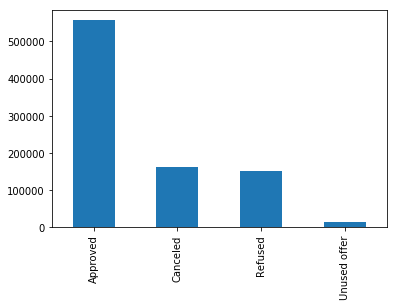

In [216]:
merge_data['NAME_CONTRACT_STATUS'].value_counts().plot.bar()

__Inference__: From the above plot we can see that Approved loans are more in number for the previously applied applications

###### 2) analysis on NAME_CASH_LOAN_PURPOSE

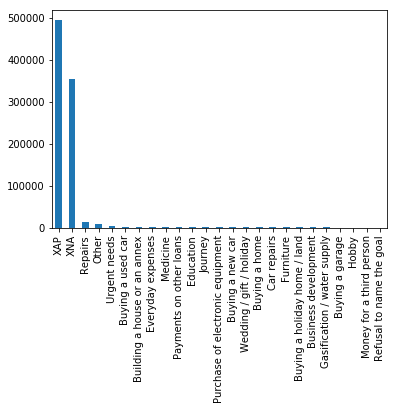

In [217]:
merge_data['NAME_CASH_LOAN_PURPOSE'].value_counts().plot.bar()

__Inference__: From the above plot we can see that XAP loans are more in number in previous applications.

##### 3) analysis of NAME_PAYMENT_TYPE

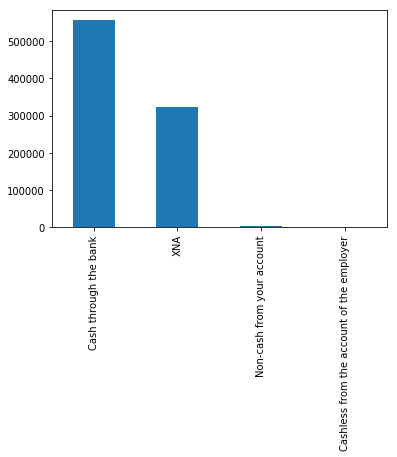

In [218]:
merge_data['NAME_PAYMENT_TYPE'].value_counts().plot.bar()

__Inference__: From the above plot we can see that majorily people prefered the repayment method as cash through bank during their previous loan applications.

###### 4) analysis on NAME_CLIENT_TYPE

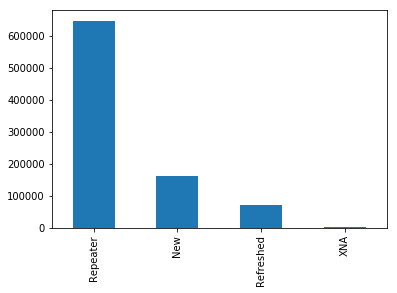

In [219]:
merge_data['NAME_CLIENT_TYPE'].value_counts().plot.bar()

__Inference__: From the above plot we can see that majorily repeater applicants are applying for loans.

###### 5) analysis on NAME_GOODS_CATEGORY

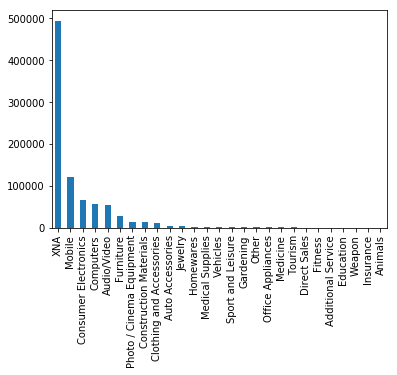

In [220]:
merge_data['NAME_GOODS_CATEGORY'].value_counts().plot.bar()

__Inference__: Apart from XNA, majority of the applicants have applied loans previously for purchasing mobiles.

###### 6) analysis on NAME_YIELD_GROUP

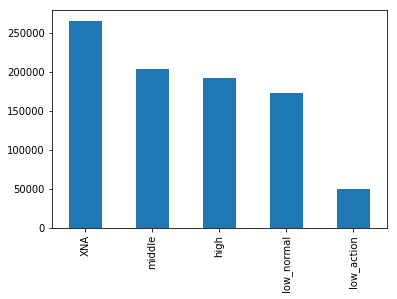

In [221]:
merge_data['NAME_YIELD_GROUP'].value_counts().plot.bar()

__Inference__: From the above plot we can see that most of the applicants previously have been issued medium range interest rate.

### Univariate analysis on numerical variables

##### 1) analysis on AMT_CREDIT_y

In [222]:
# analyzing the describe of the column
merge_data['AMT_CREDIT_y'].describe()

count    884126.00000
mean     194855.95816
std      318017.23845
min           0.00000
25%       24885.00000
50%       79749.00000
75%      209860.87500
max     4104351.00000
Name: AMT_CREDIT_y, dtype: float64

In [223]:
# analyzing the quantiles of the column
merge_data['AMT_CREDIT_y'].quantile([0.25,0.50,0.75,0.90,0.95,0.99])

0.25000     24885.00000
0.50000     79749.00000
0.75000    209860.87500
0.90000    526491.00000
0.95000    885468.37500
0.99000   1514970.00000
Name: AMT_CREDIT_y, dtype: float64

Since the variation in the quantiles is significant but at the same time capping or dropping them is not an better idea. Hence as it is needed to consider high values as well in such case it is better to bin the values.

In [224]:
# binning the AMT_CREDIT_y group
merge_data['credit_group_y'] = pd.cut(merge_data['AMT_CREDIT_y'], [0,100000,500000,1000000,1500000,2000000,999999999], labels = ['<1L','1L-5L','5L-10L','10L-15L','15L-20L','20L+'])
merge_data['credit_group_y'].head()

0      1L-5L
1    10L-15L
2      1L-5L
3        <1L
4     5L-10L
Name: credit_group_y, dtype: category
Categories (6, object): [<1L < 1L-5L < 5L-10L < 10L-15L < 15L-20L < 20L+]

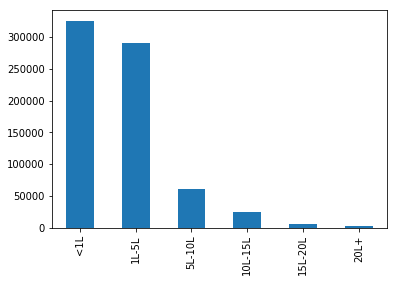

In [225]:
merge_data['credit_group_y'].value_counts().plot.bar()

__Inference__: From the above plot we can see that previously majority of the applicants have applied for every small credit amount i.e. less than 1L.

## Bivariate analysis

###### 1) NAME_CONTRACT_STATUS vs. AMT_INCOME_TOTAL

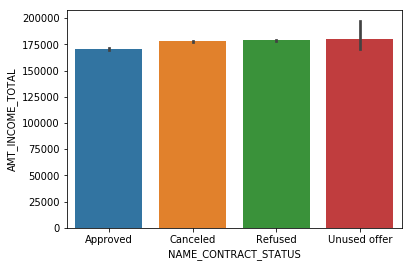

In [226]:
sns.barplot(data = merge_data, x = 'NAME_CONTRACT_STATUS', y = 'AMT_INCOME_TOTAL', estimator=np.mean)

__Inference__: From the above plot we can see that people having income range between 1.5L-1.75L previously their application got approved. Similarly people having an income range of close to 1.75L got rejected. People having income of about 1.75L rejused the offer and the same income range group people have unused the offer as well.

##### 2) income_group vs. TARGET  including NAME_CONTRACT_STATUS

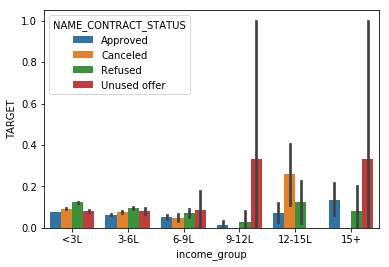

In [227]:
sns.barplot(data =merge_data, x = 'income_group', y ='TARGET', estimator= np.mean, hue = 'NAME_CONTRACT_STATUS')

__Inference__: The above plot gives information about the defaulters of different income groups and about their previous application status. We can see that people who tend to be more DEFAULTERS in every group their previous applications have been REFUSED. As per that we can see that people having income less than 3L tend to DEFAULT more hence their previous applications have been REFUSED. Similar inference can be given for people belonging to other income groups as well.

##### 3) NAME_EDUCATION_TYPE vs. TARGET including NAME_CONTRACT_STATUS

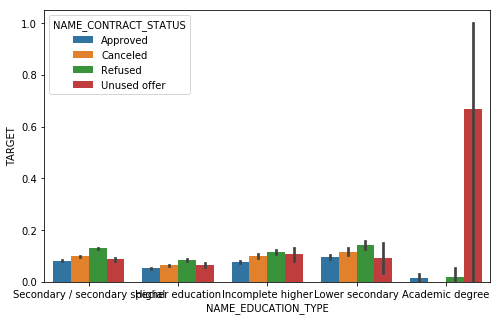

In [228]:
plt.figure(figsize= (8,5))
sns.barplot(data = merge_data, x = 'NAME_EDUCATION_TYPE', y = 'TARGET', estimator= np.mean, hue = 'NAME_CONTRACT_STATUS')

__Inference__: From the above plot we can get to know about the defaulters in every education type and their previous applications status. We can see that people who tend to be more DEFAULTERS in every education group their previous applications have been REFUSED. As per that we can see that mainly Lower Secondary educated people have more defaulters and accordingly their previous applications have been REFUSED. Similiar inference can be given for people belonging to other education groups as well and also can be understood about the trend of other DEFAULTERS and their statuses of previous applications.

Let's further more examine in which income range does the applicants belong to having different educations backgrounds so as to specifical identify the main reason for the rejection of their previous applications.

##### 4)  NAME_EDUCATION_TYPE vs. AMT_INCOME_TOTAL including NAME CONTRACT STATUS

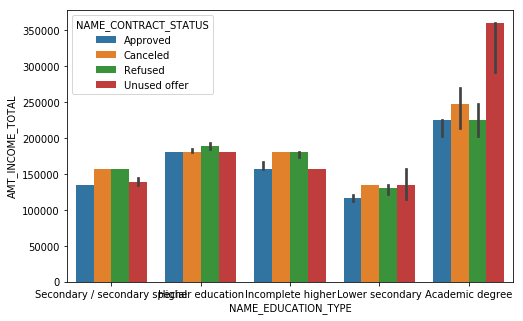

In [229]:
plt.figure(figsize= (8,5))
sns.barplot(data = merge_data, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', estimator=np.median, hue = 'NAME_CONTRACT_STATUS')

__Inference__: From the above plot we can get to know about the defaulters belonging to different education backgrounds wrt their total income and also about their previous application status. Therefore we can draw the below conclusions:<br>
1) People having secondary education and earning an income of about 1.5L their previous applications were REFUSED.<br>
2) People having higher education and earning income of about 2L their previous applications have been REFUSED.<br>
3) People having incomplete higeher education and earning an income of about 1.5-2L their previous applications have been REFUSED.<br>
4) Similarly people having Lower secondary and Academic degree and earning an income of about 1-1.5L and 2-2.5L respectively their previous applicatins have been REFUSED.<br>

Since these people having different educations their income is low hence their previous applications might be REFUSED by the company.

###### 5) NAME_FAMILY_STATUS vs. TARGET including NAME_CONTRACT_STATUS

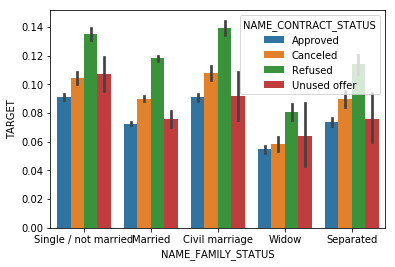

In [230]:
sns.barplot(data = merge_data, x = 'NAME_FAMILY_STATUS', y = 'TARGET', estimator= np.mean, hue = 'NAME_CONTRACT_STATUS')

__Inference__: The above plot gives information about the defaulters and their marital status including their previous application status. We can see that people who tend to be more DEFAULTERS in their respective marital groups their previous applications have been REFUSED. As per the we can infer more DEFAULTERS belong to SINGLES AND CIVIL MARRIED people whose previous applications have been REFUSED.

Let's further more examine what are the driving factors of people belonging to marital groups for the rejection of their previous applications.

##### 6) NAME_FAMILY_STATUS vs. AMT_INCOME_TOTAL including NAME_CONTRACT_STATUS

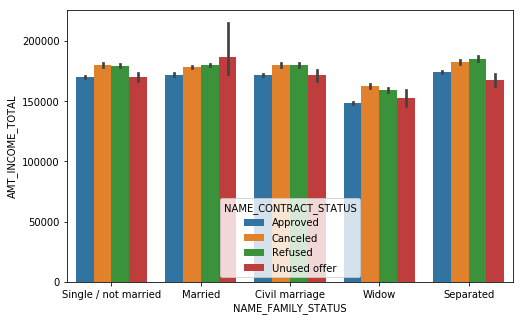

In [231]:
plt.figure(figsize= (8,5) )
sns.barplot(data = merge_data, x = 'NAME_FAMILY_STATUS', y = 'AMT_INCOME_TOTAL', estimator= np.mean, hue = 'NAME_CONTRACT_STATUS')

__Inference__: More specifically we can see that people belonging to differnet marital groups having an income of about 1.75L their previous applications have been REFUSED majorily. Since these people having low incomes hence that might be the reason for their rejection of previous application.

##### 7) age_group vs TARGET including NAME_CONTRACT_STATUS

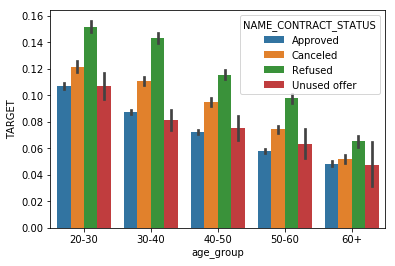

In [232]:
sns.barplot(data = merge_data, x= 'age_group', y = 'TARGET', estimator= np.mean, hue = 'NAME_CONTRACT_STATUS')

__Inference__: The above plot gives information about the defaulters belonging to different age groups and their previous application status. We can see that people who tend to be more defaulters in every age group their  previous applications have been REFUSED by the company. As per that we can see that between age group 20-30 people tend to be moew DEFAULTERS and accordingly their previous applications have been REFUSED. Similar inference can be applied for other age groups as well.

###### 8) experience_group vs. TARGET inclusing NAME_CONTRACT STATUS

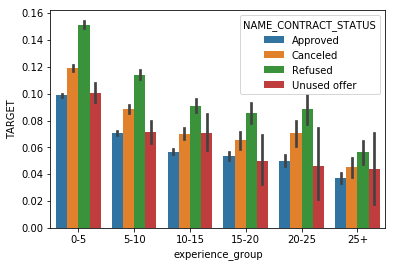

In [233]:
sns.barplot(data = merge_data, x = 'experience_group', y = 'TARGET', estimator= np.mean, hue = 'NAME_CONTRACT_STATUS')

__Inference__: The above plot gives information about the defaulters belonging to different experience group and their previous application status. We can see that the DEFAULTERS In every group tend to be REFUSED in their previous applications. As per that we can see that 0-5 experience group people tend to be more DEFAULTERS and accordingly their previous applications have been REFUSED. Similar inference can be given for all other experience group as well.

Let's examine more particularly which experience group having how much income have got their previous applications REFUSED.

##### 9)  experience_group vs. AMT_INCOME_TOTAL inclusing NAME_CONTRACT_STATUS

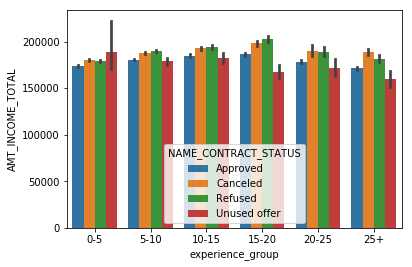

In [234]:
sns.barplot(data = merge_data, x = 'experience_group', y = 'AMT_INCOME_TOTAL', estimator= np.mean, hue = 'NAME_CONTRACT_STATUS')

__Inference__: The above plot gives information about the experience group versus their total income including their previous application status. We can see that in every experience group people having income between 1.5-2.0L mainly their previous applications have been REFUSED by the company. Since they having less income that might be the drving factor for the rejection.

##### 10) income_group vs. AMT_CREDIT_y including NAME_CONTRACT_STATUS

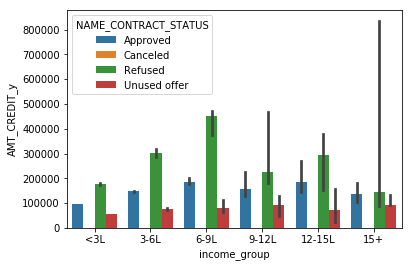

In [235]:
sns.barplot(data =  merge_data, x = 'income_group', y = 'AMT_CREDIT_y', estimator= np.median,hue = 'NAME_CONTRACT_STATUS')

__Inference__: The above plot gives information about which income group previously applied for what credit amount and their status. Therefore accordingly we can draw few conclusions:<br>
1) In less than 3L income group people who have previously applied for cerdit amount of about 2.0L got REFUSED.<br>
2) In 3-6L income group people who have previously applied for credit amount of about 3L got REFUSED.<br>
3) In 6-9L income group people who have previously applied for loan credit amount of 5L got REFUSED.<br>
Similarly in other income groups also people applying for an particular loan amounts got REFUSED previosuly.

##### 11) credit_group vs. AMT_GOODS_PRIC_x comparison with credit_group_y vs. AMT_GOODS_PRICE_y

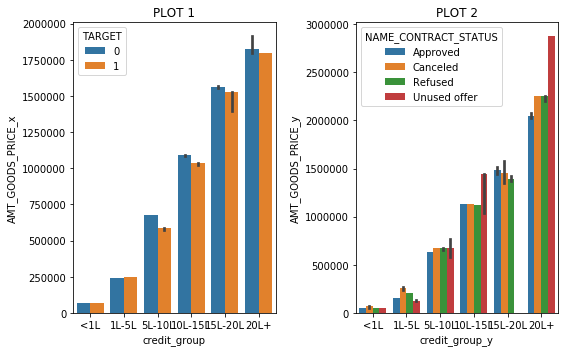

In [236]:
plt.figure(figsize= (8,5))
plt.subplot(1,2,1)
sns.barplot(data = merge_data, x = 'credit_group', y = 'AMT_GOODS_PRICE_x', estimator= np.median, hue = 'TARGET')
plt.title('PLOT 1')
plt.subplot(1,2,2)
sns.barplot(data = merge_data, x = 'credit_group_y', y= 'AMT_GOODS_PRICE_y', estimator= np.median, hue = 'NAME_CONTRACT_STATUS')
plt.title('PLOT 2')
plt.tight_layout()
plt.show()

__Inference__: The above plot gives information about the current and previous applicants credit_group versus amount goods price and their respective status. As per plot 1 there exists defaulters in every credit group who has quoted for respective GOODS PRICES. From plot 2 we can see that there exists people whose previous application got REFUSED in every credit group who have quoted for their repective GOODS PRICES. Therefore accordingly the following inferences can be made:<br>
1) People belonging to credit group of less than 1L there exists defaulters who have quoted goods price less than 2.5L as their previous applications also seems to get REJECTED when quoted for almost same amount.<br>
2) People belonging to credit group of 1-5L there exists some defaulters who have quoted their amount goods price around 2.5L. Similar range of people can be seen getting REFUSED by the bank in the same credit group in plot 2.<br><br> Similar inferences can be infered for other credit groups and their amount goods prices.

###### 12) FAMILY_MARITAL_STATUS vs TARGET including NAME_CONTRACT_STATUS

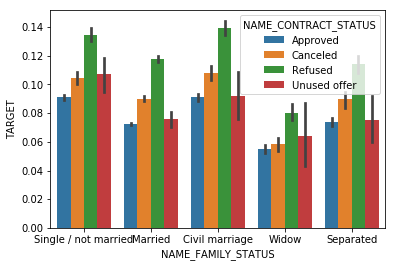

In [237]:
sns.barplot(data= merge_data, x = 'NAME_FAMILY_STATUS', y = 'TARGET', estimator= np.mean, hue = 'NAME_CONTRACT_STATUS')

__Inference__: The above plot gives information about defaulters belonging to different marital status and their previous application status as well. Therefore we can see that in every group people tend to be defaulters majorily their previous applications have been REFUSED. Based on that majorily Singles and Civil Married tend to be more DEFAULTERS and their previous applications have been REFUSED.

### Driving factors for Rejection of their applications and Being defaulters.

From the above univariate and bivaraite analysis on current applications and the merged applications we get to some applications getting REFUSED and some applicants being DEFAULTERS if issued. Therefore the main reasons for people applications getting REFUSED or if issued being DEFAULTERS are:<br>
1) Low income ranges.<br>
2) Huge family sizes but low incomes tend to make the customers be defaulters.<br>
3) Low education levels fetch low income which make them when applied being REFUSED or if accpeted they tend to DEFAULTERS.<br>
4) Family status<br>
5) Age group<br>
6) Experience level